### **Modelo ARIMA**

Un modelo autorregresivo integrado de promedio móvil o **ARIMA** es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro.
Se suele expresar como ARIMA (p,d,q) donde los parámetros p, d y q son números enteros no negativos que indican el orden de las distintas componentes del modelo — respectivamente, las componentes autorregresiva, integrada y de media móvil.

### **Librerías**

In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')
from random import seed
from sklearn.model_selection import train_test_split
import datetime as dt
from datetime import datetime
from datetime import date
from pmdarima.arima import auto_arima

In [2]:
data = pd.read_csv("../Datos/data_final.csv", sep = ',') ## Cargue datos

A continuación se presentan los pronósticos para las cinco ciudades principales de Colombia para los casos activos, casos confirmados, casos recuperados y casos fallecidos, frente a la evolución de la pandemia de COVID-19, con la finalidad de evaluar el comportamiento de este virus en las personas.

## **Ciudad Medellín**

### **Casos Activos**

In [3]:
data_med = data[data['ciudad_de_ubicaci_n']=='Medellín']

In [4]:
data_med_activos = data_med[['fecha_reporte_web','casos_activos']]

In [5]:
data_med_activos = data_med_activos.set_index('fecha_reporte_web')

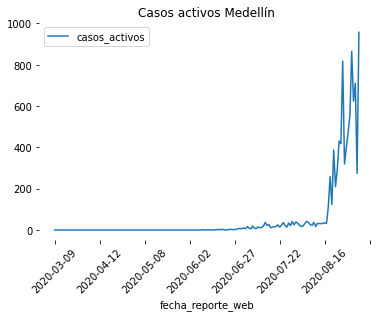

In [6]:
ax = data_med_activos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos activos Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [7]:
arima_model_med_activos = auto_arima(data_med_activos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1880.452, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1847.847, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1830.311, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1845.332, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1827.670, Time=0.18 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1826.059, Time=0.08 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=1827.565, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=1829.308, Time=0.38 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1869.058, Time=0.05 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=1827.722, Time=0.18 sec
 ARIMA(0,1,2)(1,1,0)[7]             : AIC=1827.555, Time=0.11 sec
 ARIMA(1,1,2)(1,1,0)[7]             : AIC=1822.885, Time=0.42 sec
 ARIMA(1,1,2)(0,1,0)[7]             : AIC=1833.264, Time=0.15 sec
 ARIMA(1,1,2)(2,1,0)[7]             : AIC=1821.641, Time=0.85 sec
 ARIMA(1,1,2)(3,1,0)[7]          

In [8]:
arima_model_med_activos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  170
Model:             SARIMAX(1, 1, 2)x(3, 1, [], 7)   Log Likelihood                -903.689
Date:                            Sat, 05 Sep 2020   AIC                           1821.377
Time:                                    15:17:32   BIC                           1842.990
Sample:                                         0   HQIC                          1830.153
                                            - 170                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6805      0.079     -8.589      0.000      -0.836      -0.525
ma.L1          0.2528      0.080      3.172      0.002       0.097       0.409
ma.L2         -0.6671      0.047    -14.329      0.000      -0.758      -0.576
ar.S.L7       -0.4225      0.053     -7.988      0.000      -0.526      -0.319
ar.S.L14       0.3594      0.057      6.344      0.000       0.248       0.470
ar.S.L21       0.2737      0.537      0.510      0.610      -0.779       1.326
sigma2      3978.2161    220.572     18.036      0.000    3545.902    4410.530
===================================================================================
Ljung-Box (Q):                       56.16   Jarque-Bera (JB):              1079.25
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                             1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [10]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [11]:
prediction_med_activos_corto = pd.DataFrame(arima_model_med_activos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_med_activos_corto.columns=['pred_casos_activos_med_corto']
prediction_med_activos_corto= pd.DataFrame(prediction_med_activos_corto)

In [12]:
data_med_activos.index = pd.to_datetime(data_med_activos.index)

In [13]:
arima_model_med_activos.order

(1, 1, 2)

In [14]:
prediction_med_activos_corto[prediction_med_activos_corto < 0] = 0

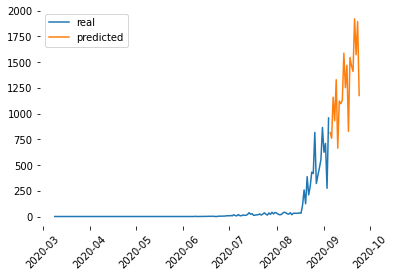

In [15]:
fig, ax = plt.subplots()
plt.plot(data_med_activos, label= 'real')
plt.plot(prediction_med_activos_corto, label='predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [16]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_med_activos.order ,",  es decir, con", arima_model_med_activos.order[0], " períodos para modelo autorregresivo, con ", arima_model_med_activos.order[1], "diferenciación de la serie, y con ", arima_model_med_activos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_med_activos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_med_activos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 2) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  2  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


In [17]:
data_med_activos_diff = data_med_activos.diff(periods=1)

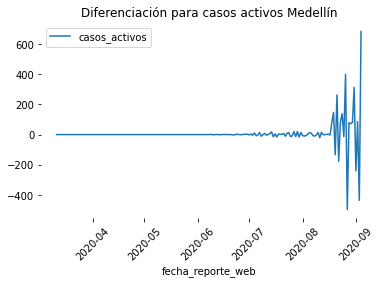

In [18]:
ax = data_med_activos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para casos activos Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Confirmados**

In [19]:
data_med_confirmados = data_med[['fecha_reporte_web','conteo_confirmados']]

In [20]:
data_med_confirmados = data_med_confirmados.set_index('fecha_reporte_web')

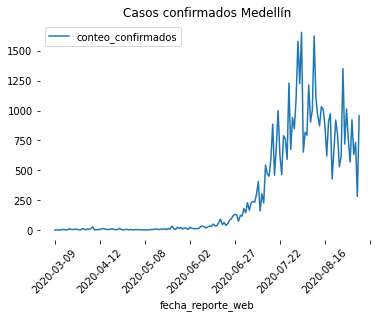

In [21]:
ax=data_med_confirmados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos confirmados Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [22]:
arima_model_med_confirmados= auto_arima(data_med_confirmados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2218.491, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2188.491, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2125.557, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2170.458, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=2121.964, Time=0.45 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=2151.418, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=2123.457, Time=0.94 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=2123.774, Time=0.99 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=2121.920, Time=0.31 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=inf, Time=2.30 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=2175.521, Time=0.29 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=2123.474, Time=0.80 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=2123.390, Time=0.48 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=2

In [23]:
arima_model_med_confirmados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  170
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1056.960
Date:                                Sat, 05 Sep 2020   AIC                           2121.920
Time:                                        15:17:44   BIC                           2134.270
Sample:                                             0   HQIC                          2126.934
                                                - 170                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6944      0.038    -18.170      0.000      -0.769      -0.619
ma.S.L7       -0.6572      0.050    -13.017      0.000      -0.756      -0.558
ma.S.L14      -0.1846      0.058     -3.157      0.002      -0.299      -0.070
sigma2      2.585e+04   1531.256     16.878      0.000    2.28e+04    2.88e+04
===================================================================================
Ljung-Box (Q):                       77.85   Jarque-Bera (JB):               247.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):            2886.33   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [25]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [26]:
prediction_med_confirmados_corto = pd.DataFrame(arima_model_med_confirmados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_med_confirmados_corto.columns=['pred_casos_confirmados_med_corto']
prediction_med_confirmados_corto= pd.DataFrame(prediction_med_confirmados_corto)

In [27]:
data_med_confirmados.index = pd.to_datetime(data_med_confirmados.index)

In [28]:
arima_model_med_confirmados.order

(0, 1, 1)

In [29]:
prediction_med_confirmados_corto[prediction_med_confirmados_corto < 0] = 0

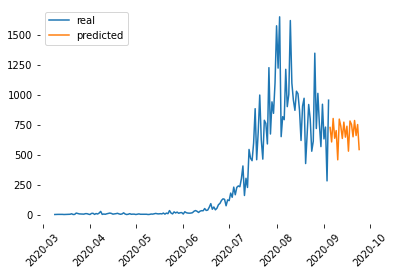

In [30]:
fig, ax = plt.subplots()
plt.plot(data_med_confirmados, label='real')
plt.plot(prediction_med_confirmados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [31]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_med_confirmados.order ,",  es decir, con", arima_model_med_confirmados.order[0], " períodos para modelo autorregresivo, con ", arima_model_med_confirmados.order[1], "diferenciación de la serie, y con ", arima_model_med_confirmados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_med_confirmados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_med_confirmados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (0, 1, 1) ,  es decir, con 0  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


In [32]:
data_med_confirmados_diff = data_med_confirmados.diff(periods=1)

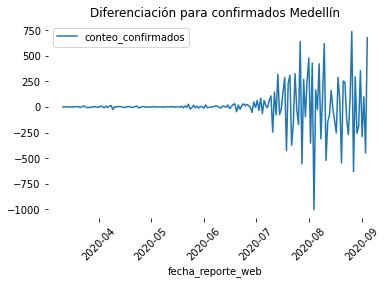

In [33]:
ax = data_med_confirmados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para confirmados Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Recuperados**

In [34]:
data_med_recuperados = data_med[['fecha_reporte_web','conteo_recuperado']]

In [35]:
data_med_recuperados= data_med_recuperados.set_index('fecha_reporte_web')

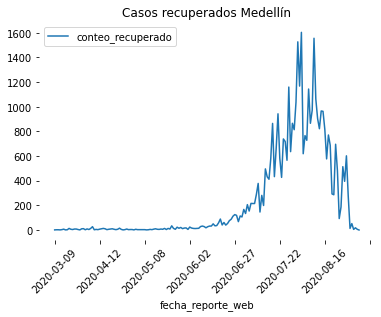

In [36]:
ax = data_med_recuperados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos recuperados Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [37]:
arima_model_med_recuperados= auto_arima(data_med_recuperados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2193.013, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2160.076, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2112.445, Time=0.28 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2153.691, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=2132.802, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=2150.757, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=2114.164, Time=0.34 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=2114.111, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=2126.961, Time=0.20 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=2110.378, Time=0.47 sec
 ARIMA(1,1,2)(0,1,0)[7]             : AIC=2151.284, Time=0.20 sec
 ARIMA(1,1,2)(1,1,1)[7]             : AIC=inf, T

In [38]:
arima_model_med_recuperados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  170
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 7)   Log Likelihood               -1045.003
Date:                             Sat, 05 Sep 2020   AIC                           2102.006
Time:                                     15:18:02   BIC                           2120.531
Sample:                                          0   HQIC                          2109.527
                                             - 170                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2175      0.065     18.800      0.000       1.091       1.344
ar.L2         -0.2643      0.066     -3.989      0.000      -0.394      -0.134
ma.L1         -1.8541      0.039    -47.661      0.000      -1.930      -1.778
ma.L2          0.9083      0.035     25.895      0.000       0.840       0.977
ma.S.L7       -0.9098      0.031    -29.346      0.000      -0.971      -0.849
sigma2      2.164e+04   1359.842     15.913      0.000     1.9e+04    2.43e+04
===================================================================================
Ljung-Box (Q):                       55.03   Jarque-Bera (JB):               213.00
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):            2840.82   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [40]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [41]:
prediction_med_recuperados_corto = pd.DataFrame(arima_model_med_recuperados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_med_recuperados_corto.columns=['pred_casos_recuperados_med_corto']
prediction_med_recuperados_corto= pd.DataFrame(prediction_med_recuperados_corto)

In [42]:
data_med_recuperados.index = pd.to_datetime(data_med_recuperados.index)

In [43]:
arima_model_med_recuperados.order

(2, 1, 2)

In [44]:
prediction_med_recuperados_corto[prediction_med_recuperados_corto < 0] = 0

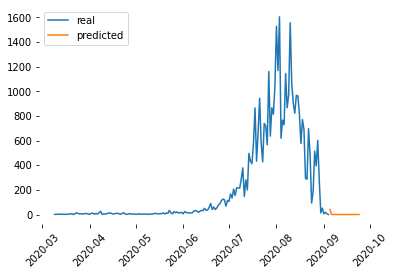

In [45]:
fig, ax = plt.subplots()
plt.plot(data_med_recuperados, label='real')
plt.plot(prediction_med_recuperados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [46]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_med_recuperados.order ,",  es decir, con", arima_model_med_recuperados.order[0], " períodos para modelo autorregresivo, con ", arima_model_med_recuperados.order[1], "diferenciación de la serie, y con ", arima_model_med_recuperados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_med_recuperados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_med_recuperados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (2, 1, 2) ,  es decir, con 2  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  2  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


In [47]:
data_med_recuperados_diff = data_med_recuperados.diff(periods=1)

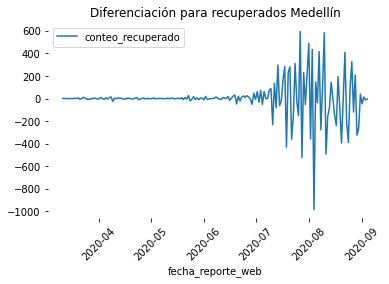

In [48]:
ax = data_med_recuperados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para recuperados Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Fallecidos**

In [49]:
data_med_fallecidos = data_med[['fecha_reporte_web','conteo_fallecidos']]

In [50]:
data_med_fallecidos = data_med_fallecidos.set_index('fecha_reporte_web')

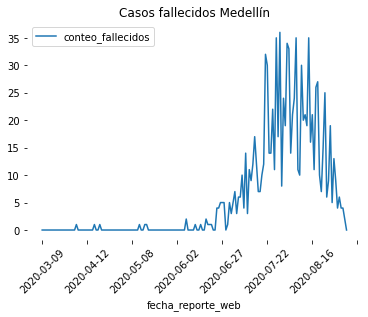

In [51]:
ax=data_med_fallecidos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos fallecidos Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [52]:
arima_model_med_fallecidos = auto_arima(data_med_fallecidos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1170.684, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1115.579, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1015.272, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1062.828, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1050.138, Time=0.05 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1010.699, Time=0.30 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=1011.279, Time=0.59 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=1012.090, Time=0.27 sec
 ARIMA(0,1,1)(2,1,3)[7]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=1096.536, Time=0.22 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=0.42 s

In [53]:
arima_model_med_fallecidos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  170
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 7)   Log Likelihood                -494.958
Date:                           Sat, 05 Sep 2020   AIC                           1003.917
Time:                                   15:18:28   BIC                           1025.530
Sample:                                        0   HQIC                          1012.692
                                           - 170                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9749      0.030    -32.476      0.000      -1.034      -0.916
ma.L1          0.1421      0.046      3.088      0.002       0.052       0.232
ma.L2         -0.6736      0.065    -10.365      0.000      -0.801      -0.546
ar.S.L7       -0.4547      0.130     -3.493      0.000      -0.710      -0.200
ma.S.L7       -0.1317      0.121     -1.086      0.278      -0.369       0.106
ma.S.L14      -0.7440      0.081     -9.154      0.000      -0.903      -0.585
sigma2        24.0967      1.665     14.470      0.000      20.833      27.361
===================================================================================
Ljung-Box (Q):                       69.42   Jarque-Bera (JB):               182.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             510.25   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [55]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [56]:
prediction_med_fallecidos_corto = pd.DataFrame(arima_model_med_fallecidos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_med_fallecidos_corto.columns=['pred_casos_fallecidos_med_corto']
prediction_med_fallecidos_corto= pd.DataFrame(prediction_med_fallecidos_corto)

In [57]:
data_med_fallecidos.index = pd.to_datetime(data_med_fallecidos.index)

In [58]:
arima_model_med_fallecidos.order

(1, 1, 2)

In [59]:
prediction_med_fallecidos_corto[prediction_med_fallecidos_corto < 0] = 0

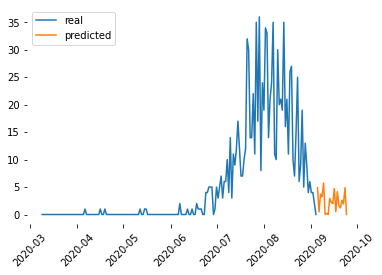

In [60]:
fig, ax = plt.subplots()
plt.plot(data_med_fallecidos, label='real')
plt.plot(prediction_med_fallecidos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [61]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_med_fallecidos.order ,",  es decir, con", arima_model_med_fallecidos.order[0], " períodos para modelo autorregresivo, con ", arima_model_med_fallecidos.order[1], "diferenciación de la serie, y con ", arima_model_med_fallecidos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_med_fallecidos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_med_fallecidos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 2) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  2  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


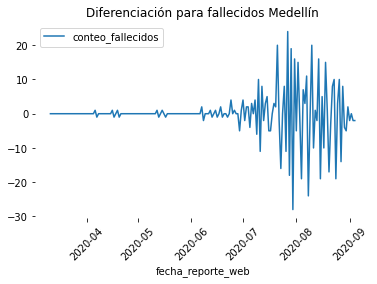

In [62]:
data_med_fallecidos_diff = data_med_fallecidos.diff(periods=1)
ax=data_med_fallecidos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para fallecidos Medellín")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

## **Ciudad Bogotá D.C.**

### **Casos Activos**

In [63]:
data_bgta = data[data['ciudad_de_ubicaci_n']=='Bogotá D.C.']

In [64]:
data_bgta_activos = data_bgta[['fecha_reporte_web','casos_activos']]

In [65]:
data_bgta_activos = data_bgta_activos.set_index('fecha_reporte_web')

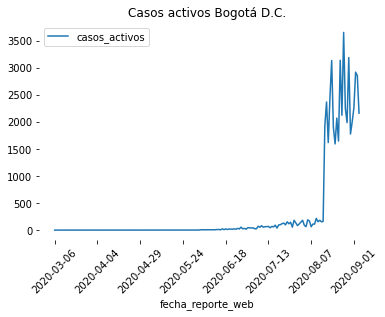

In [66]:
ax=data_bgta_activos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos activos Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [67]:
arima_model_bgta_activos= auto_arima(data_bgta_activos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2527.539, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2446.328, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2433.217, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2497.377, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=2434.754, Time=0.27 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=2434.696, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=2448.953, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=2466.231, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=2434.147, Time=0.24 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=2434.059, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=2435.294, Time=0.16 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=2434.632, Time=0.30 sec

Best model:  ARIMA(0,1,1)(0,1,1)[7]       

In [68]:
arima_model_bgta_activos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  179
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -1213.608
Date:                           Sat, 05 Sep 2020   AIC                           2433.217
Time:                                   15:18:32   BIC                           2442.642
Sample:                                        0   HQIC                          2437.041
                                           - 179                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4542      0.025    -17.858      0.000      -0.504      -0.404
ma.S.L7       -0.7251      0.041    -17.862      0.000      -0.805      -0.646
sigma2      8.316e+04   3093.975     26.879      0.000    7.71e+04    8.92e+04
===================================================================================
Ljung-Box (Q):                       53.01   Jarque-Bera (JB):              1664.13
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):         7137976.64   Skew:                             2.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [70]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [71]:
prediction_bgta_activos_corto = pd.DataFrame(arima_model_bgta_activos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_bgta_activos_corto.columns=['pred_casos_activos_bgta_corto']
prediction_bgta_activos_corto= pd.DataFrame(prediction_bgta_activos_corto)

In [72]:
data_bgta_activos.index = pd.to_datetime(data_bgta_activos.index)

In [73]:
arima_model_bgta_activos.order

(0, 1, 1)

In [74]:
prediction_bgta_activos_corto[prediction_bgta_activos_corto < 0] = 0

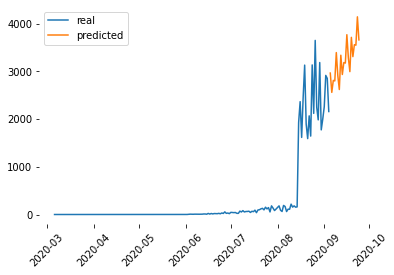

In [75]:
fig, ax = plt.subplots()
plt.plot(data_bgta_activos, label='real')
plt.plot(prediction_bgta_activos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [76]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_bgta_activos.order ,",  es decir, con", arima_model_bgta_activos.order[0], " períodos para modelo autorregresivo, con ", arima_model_bgta_activos.order[1], "diferenciación de la serie, y con ", arima_model_bgta_activos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_bgta_activos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_bgta_activos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (0, 1, 1) ,  es decir, con 0  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


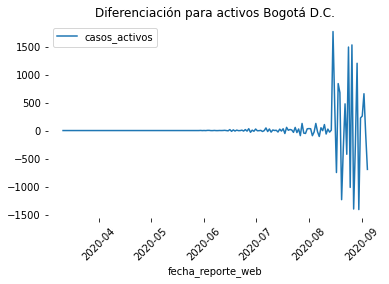

In [77]:
data_bgta_activos_diff = data_bgta_activos.diff(periods=1)
ax=data_bgta_activos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para activos Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Confirmados**

In [78]:
data_bgta_confirmados = data_bgta[['fecha_reporte_web','conteo_confirmados']]

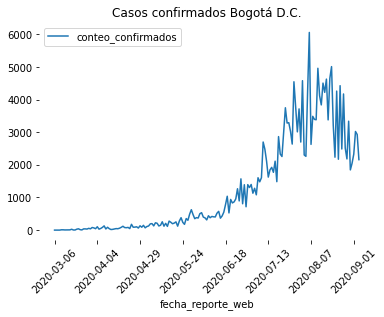

In [79]:
data_bgta_confirmados = data_bgta_confirmados.set_index('fecha_reporte_web')
ax=data_bgta_confirmados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos confirmados Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [80]:
arima_model_bgta_confirmados= auto_arima(data_bgta_confirmados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2858.378, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2703.927, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2803.847, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2684.041, Time=0.34 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=2685.447, Time=0.56 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=2679.431, Time=0.28 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=2680.894, Time=0.82 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=2682.350, Time=0.72 sec
 ARIMA(1,1,0)(2,1,2)[7]             : AIC=inf, Time=1.32 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=2745.864, Time=0.21 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=2662.301, Time=0.54 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=inf, Time=0

In [81]:
arima_model_bgta_confirmados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  179
Model:             SARIMAX(2, 1, 0)x(2, 1, [1], 7)   Log Likelihood               -1324.152
Date:                             Sat, 05 Sep 2020   AIC                           2660.304
Time:                                     15:18:56   BIC                           2679.154
Sample:                                          0   HQIC                          2667.952
                                             - 179                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7405      0.039    -18.840      0.000      -0.818      -0.663
ar.L2         -0.3453      0.044     -7.861      0.000      -0.431      -0.259
ar.S.L7       -0.0789      0.083     -0.950      0.342      -0.242       0.084
ar.S.L14       0.2505      0.075      3.363      0.001       0.104       0.397
ma.S.L7       -0.9192      0.081    -11.356      0.000      -1.078      -0.761
sigma2      2.953e+05   1.89e+04     15.638      0.000    2.58e+05    3.32e+05
===================================================================================
Ljung-Box (Q):                       88.91   Jarque-Bera (JB):               313.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             606.99   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [83]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [84]:
prediction_bgta_confirmados_corto = pd.DataFrame(arima_model_bgta_confirmados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_bgta_confirmados_corto.columns=['pred_casos_confirmados_bgta_corto']
prediction_bgta_confirmados_corto= pd.DataFrame(prediction_bgta_confirmados_corto)

In [85]:
data_bgta_confirmados.index = pd.to_datetime(data_bgta_confirmados.index)

In [86]:
arima_model_bgta_confirmados.order

(2, 1, 0)

In [87]:
prediction_bgta_confirmados_corto[prediction_bgta_confirmados_corto < 0] = 0

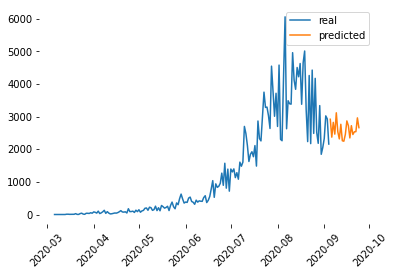

In [88]:
fig, ax = plt.subplots()
plt.plot(data_bgta_confirmados, label='real')
plt.plot(prediction_bgta_confirmados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [89]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_bgta_confirmados.order ,",  es decir, con", arima_model_bgta_confirmados.order[0], " períodos para modelo autorregresivo, con ", arima_model_bgta_confirmados.order[1], "diferenciación de la serie, y con ", arima_model_bgta_confirmados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_bgta_confirmados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_bgta_confirmados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (2, 1, 0) ,  es decir, con 2  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  0  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


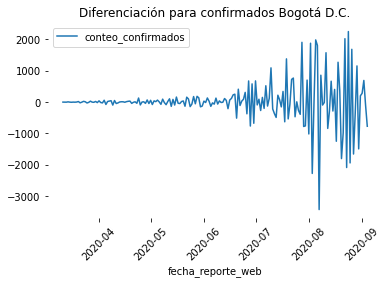

In [90]:
data_bgta_confirmados_diff = data_bgta_confirmados.diff(periods=1)
ax = data_bgta_confirmados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para confirmados Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Recuperados**

In [91]:
data_bgta_recuperados = data_bgta[['fecha_reporte_web','conteo_recuperado']]

In [92]:
data_bgta_recuperados = data_bgta_recuperados.set_index('fecha_reporte_web')

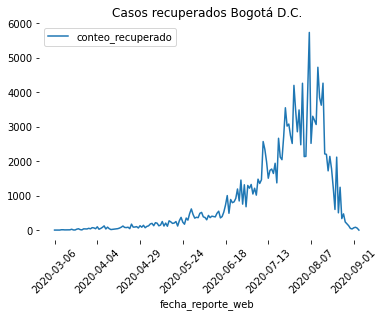

In [93]:
ax=data_bgta_recuperados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos recuperados Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [94]:
arima_model_bgta_recuperados= auto_arima(data_bgta_recuperados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2821.182, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2667.210, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2774.400, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2647.400, Time=0.23 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=2648.049, Time=0.37 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.87 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2676.651, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2636.123, Time=0.30 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=2647.187, Time=0.13 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=2637.209, Time=0.90 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=0.98 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=2621.355, Time=0

In [95]:
arima_model_bgta_recuperados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  179
Model:             SARIMAX(3, 1, 0)x(1, 1, [1], 7)   Log Likelihood               -1303.589
Date:                             Sat, 05 Sep 2020   AIC                           2619.178
Time:                                     15:19:18   BIC                           2638.028
Sample:                                          0   HQIC                          2626.826
                                             - 179                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5956      0.038    -15.600      0.000      -0.670      -0.521
ar.L2         -0.3300      0.053     -6.191      0.000      -0.434      -0.226
ar.L3         -0.1554      0.049     -3.197      0.001      -0.251      -0.060
ar.S.L7       -0.2036      0.067     -3.021      0.003      -0.336      -0.072
ma.S.L7       -0.8803      0.040    -22.214      0.000      -0.958      -0.803
sigma2      2.304e+05   1.39e+04     16.553      0.000    2.03e+05    2.58e+05
===================================================================================
Ljung-Box (Q):                       65.31   Jarque-Bera (JB):               251.75
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):             532.07   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [97]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [98]:
prediction_bgta_recuperados_corto = pd.DataFrame(arima_model_bgta_recuperados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_bgta_recuperados_corto.columns=['pred_casos_recuperados_bgta_corto']
prediction_bgta_recuperados_corto= pd.DataFrame(prediction_bgta_recuperados_corto)

In [99]:
data_bgta_recuperados.index = pd.to_datetime(data_bgta_recuperados.index)

In [100]:
arima_model_bgta_recuperados.order

(3, 1, 0)

In [101]:
prediction_bgta_recuperados_corto[prediction_bgta_recuperados_corto < 0] = 0

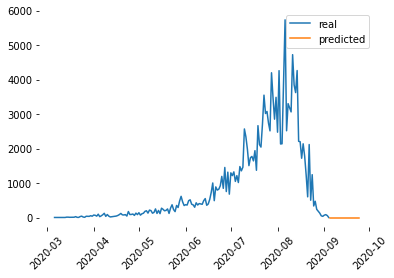

In [102]:
fig, ax = plt.subplots()
plt.plot(data_bgta_recuperados, label='real')
plt.plot(prediction_bgta_recuperados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [103]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_bgta_recuperados.order ,",  es decir, con", arima_model_bgta_recuperados.order[0], " períodos para modelo autorregresivo, con ", arima_model_bgta_recuperados.order[1], "diferenciación de la serie, y con ", arima_model_bgta_recuperados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_bgta_recuperados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_bgta_recuperados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (3, 1, 0) ,  es decir, con 3  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  0  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


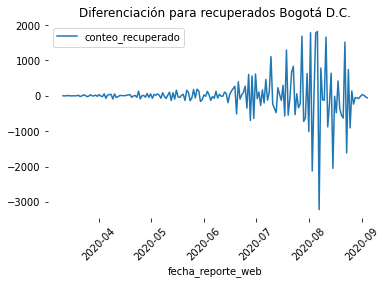

In [104]:
data_bgta_recuperados_diff = data_bgta_recuperados.diff(periods=1)
ax=data_bgta_recuperados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para recuperados Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos fallecidos**

In [105]:
data_bgta_fallecidos = data_bgta[['fecha_reporte_web','conteo_fallecidos']]

In [106]:
data_bgta_fallecidos = data_bgta_fallecidos.set_index('fecha_reporte_web')

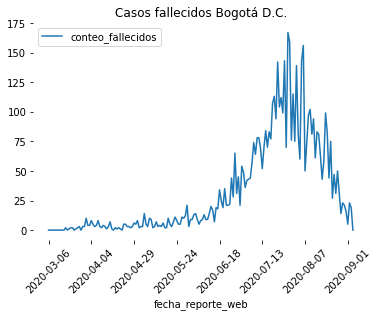

In [107]:
ax=data_bgta_fallecidos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos fallecidos Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [108]:
arima_model_bgta_fallecidos= auto_arima(data_bgta_fallecidos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1649.099, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1523.051, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1466.218, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1539.801, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1467.447, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=1467.855, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1477.207, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1468.045, Time=0.55 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1550.489, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1463.482, Time=0.28 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=1539.836, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=1463.688, Time=0.36 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=1464.574, Time=0.32 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=1475.474, Time=0.11 sec
 ARIMA(1,1,1)(1,1,2)[7]          

In [109]:
arima_model_bgta_fallecidos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  179
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 7)   Log Likelihood                -714.229
Date:                             Sat, 05 Sep 2020   AIC                           1444.457
Time:                                     15:20:12   BIC                           1469.590
Sample:                                          0   HQIC                          1454.655
                                             - 179                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3613      0.103      3.508      0.000       0.159       0.563
ar.L2         -0.8063      0.049    -16.450      0.000      -0.902      -0.710
ar.L3         -0.1425      0.075     -1.891      0.059      -0.290       0.005
ma.L1         -1.2942      0.099    -13.087      0.000      -1.488      -1.100
ma.L2          1.3871      0.099     13.948      0.000       1.192       1.582
ma.L3         -0.5395      0.090     -5.966      0.000      -0.717      -0.362
ma.S.L7       -0.7418      0.056    -13.335      0.000      -0.851      -0.633
sigma2       234.7590     16.653     14.097      0.000     202.121     267.397
===================================================================================
Ljung-Box (Q):                       39.79   Jarque-Bera (JB):               146.18
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):              68.05   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [111]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [112]:
prediction_bgta_fallecidos_corto = pd.DataFrame(arima_model_bgta_fallecidos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_bgta_fallecidos_corto.columns=['pred_casos_fallecidos_bgta_corto']
prediction_bgta_fallecidos_corto= pd.DataFrame(prediction_bgta_fallecidos_corto)

In [113]:
data_bgta_fallecidos.index = pd.to_datetime(data_bgta_fallecidos.index)

In [114]:
arima_model_bgta_fallecidos.order

(3, 1, 3)

In [115]:
prediction_bgta_fallecidos_corto[prediction_bgta_fallecidos_corto < 0] = 0

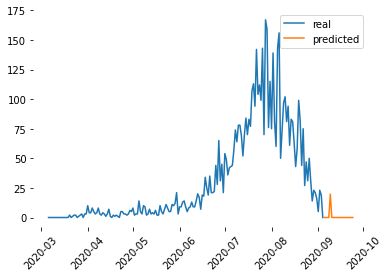

In [116]:
fig, ax = plt.subplots()
plt.plot(data_bgta_fallecidos, label='real')
plt.plot(prediction_bgta_fallecidos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [117]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_bgta_fallecidos.order ,",  es decir, con", arima_model_bgta_fallecidos.order[0], " períodos para modelo autorregresivo, con ", arima_model_bgta_fallecidos.order[1], "diferenciación de la serie, y con ", arima_model_bgta_fallecidos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_bgta_fallecidos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_bgta_fallecidos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (3, 1, 3) ,  es decir, con 3  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  3  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


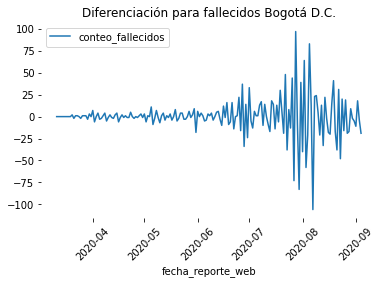

In [118]:
data_bgta_fallecidos_diff = data_bgta_fallecidos.diff(periods=1)
ax=data_bgta_fallecidos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para fallecidos Bogotá D.C.")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

## **Ciudad Cali**

### **Casos Activos**

In [119]:
data_cali = data[data['ciudad_de_ubicaci_n']=='Cali']

In [120]:
data_cali_activos = data_cali[['fecha_reporte_web','casos_activos']]

In [121]:
data_cali_activos = data_cali_activos.set_index('fecha_reporte_web')

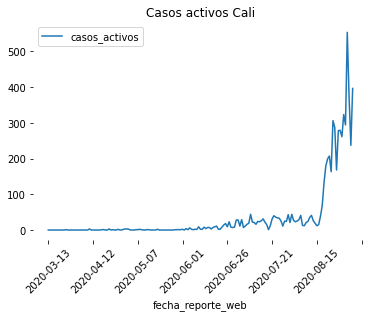

In [122]:
ax=data_cali_activos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos activos Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [123]:
arima_model_cali_activos= auto_arima(data_cali_activos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1680.794, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1635.297, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1604.874, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1625.091, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1606.604, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=1606.320, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1614.378, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1606.907, Time=0.31 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1649.803, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1606.811, Time=0.15 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=1606.713, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=1625.828, Time=0.09 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=1590.134, Time=0.29 sec
 ARIMA(1,1,2)(0,1,0)[7]             : AIC=1611.043, Time=0.14 sec
 ARIMA(1,1,2)(1,1,1)[7]          

In [124]:
arima_model_cali_activos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  171
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 7)   Log Likelihood                -775.955
Date:                             Sat, 05 Sep 2020   AIC                           1567.910
Time:                                     15:20:46   BIC                           1592.660
Sample:                                          0   HQIC                          1577.959
                                             - 171                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5059      0.029    -52.780      0.000      -1.562      -1.450
ar.L2         -0.9736      0.039    -24.897      0.000      -1.050      -0.897
ma.L1          1.1785      0.076     15.524      0.000       1.030       1.327
ma.L2          0.1200      0.109      1.104      0.270      -0.093       0.333
ma.L3         -0.4809      0.047    -10.336      0.000      -0.572      -0.390
ar.S.L7        0.2181      0.212      1.030      0.303      -0.197       0.633
ma.S.L7       -0.6542      0.204     -3.205      0.001      -1.054      -0.254
sigma2       750.4101     50.292     14.921      0.000     651.840     848.980
===================================================================================
Ljung-Box (Q):                       37.39   Jarque-Bera (JB):              5077.19
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):            1582.87   Skew:                             3.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [126]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [127]:
prediction_cali_activos_corto = pd.DataFrame(arima_model_cali_activos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cali_activos_corto.columns=['pred_casos_activos_cali_corto']
prediction_cali_activos_corto= pd.DataFrame(prediction_cali_activos_corto)

In [128]:
data_cali_activos.index = pd.to_datetime(data_cali_activos.index)

In [129]:
arima_model_cali_activos.order

(2, 1, 3)

In [130]:
prediction_cali_activos_corto[prediction_cali_activos_corto < 0] = 0

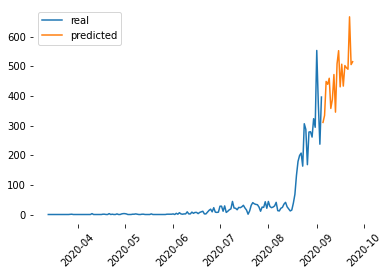

In [131]:
fig, ax = plt.subplots()
plt.plot(data_cali_activos, label='real')
plt.plot(prediction_cali_activos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [132]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cali_activos.order ,",  es decir, con", arima_model_cali_activos.order[0], " períodos para modelo autorregresivo, con ", arima_model_cali_activos.order[1], "diferenciación de la serie, y con ", arima_model_cali_activos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cali_activos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cali_activos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (2, 1, 3) ,  es decir, con 2  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  3  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


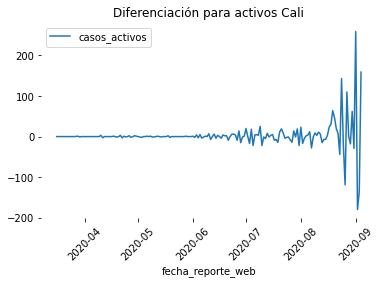

In [133]:
data_cali_activos_diff = data_cali_activos.diff(periods=1)
ax=data_cali_activos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para activos Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Confirmados**

In [134]:
data_cali_confirmados = data_cali[['fecha_reporte_web','conteo_confirmados']]

In [135]:
data_cali_confirmados = data_cali_confirmados.set_index('fecha_reporte_web')

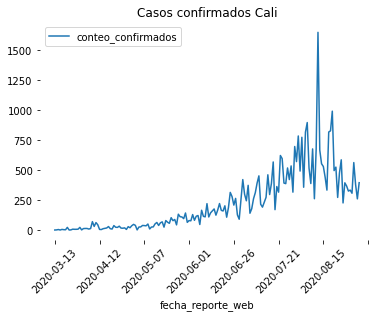

In [136]:
ax=data_cali_confirmados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos confirmados Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [137]:
arima_model_cali_confirmados= auto_arima(data_cali_confirmados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2259.746, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2183.037, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2089.022, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2141.075, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=2085.632, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=2085.040, Time=0.99 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=inf, Time=1.45 sec
 ARIMA(0,1,1)(0,1,4)[7]             : AIC=2084.758, Time=2.12 sec
 ARIMA(0,1,1)(1,1,4)[7]             : AIC=inf, Time=4.10 sec
 ARIMA(0,1,1)(0,1,5)[7]             : AIC=2086.379, Time=3.23 sec
 ARIMA(0,1,1)(1,1,5)[7]             : AIC=inf, Time=4.95 sec
 ARIMA(0,1,0)(0,1,4)[7]             : AIC=inf, Time=1.37 sec
 ARIMA(1,1,1)(0,1,4)[7]             : AIC=2085.601, Time=1.73 s

In [138]:
arima_model_cali_confirmados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:                                            y   No. Observations:                  171
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2, 3, 4], 7)   Log Likelihood               -1036.379
Date:                                      Sat, 05 Sep 2020   AIC                           2084.758
Time:                                              15:21:19   BIC                           2103.320
Sample:                                                   0   HQIC                          2092.294
                                                      - 171                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7958      0.039    -20.630      0.000      -0.871      -0.720
ma.S.L7       -0.7347      0.059    -12.439      0.000      -0.850      -0.619
ma.S.L14      -0.3089      0.051     -6.013      0.000      -0.410      -0.208
ma.S.L21       0.1117      0.081      1.385      0.166      -0.046       0.270
ma.S.L28       0.1572      0.093      1.682      0.093      -0.026       0.340
sigma2      1.823e+04   1282.832     14.210      0.000    1.57e+04    2.07e+04
===================================================================================
Ljung-Box (Q):                       49.35   Jarque-Bera (JB):               769.05
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):             209.01   Skew:                             1.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [140]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [141]:
prediction_cali_confirmados_corto = pd.DataFrame(arima_model_cali_confirmados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cali_confirmados_corto.columns=['pred_casos_confirmados_cali_corto']
prediction_cali_confirmados_corto= pd.DataFrame(prediction_cali_confirmados_corto)

In [142]:
data_cali_confirmados.index = pd.to_datetime(data_cali_confirmados.index)

In [143]:
arima_model_cali_confirmados.order

(0, 1, 1)

In [144]:
prediction_cali_confirmados_corto[prediction_cali_confirmados_corto < 0] = 0

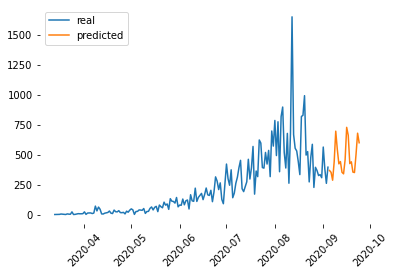

In [145]:
fig, ax = plt.subplots()
plt.plot(data_cali_confirmados, label='real')
plt.plot(prediction_cali_confirmados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [146]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cali_confirmados.order ,",  es decir, con", arima_model_cali_confirmados.order[0], " períodos para modelo autorregresivo, con ", arima_model_cali_confirmados.order[1], "diferenciación de la serie, y con ", arima_model_cali_confirmados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cali_confirmados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cali_confirmados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (0, 1, 1) ,  es decir, con 0  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


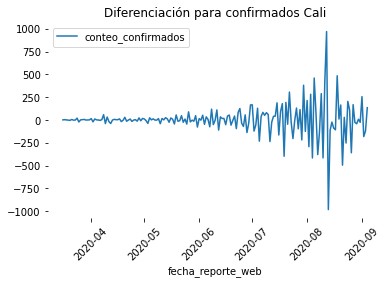

In [147]:
data_cali_confirmados_diff = data_cali_confirmados.diff(periods=1)
ax=data_cali_confirmados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para confirmados Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Recuperados**

In [148]:
data_cali_recuperados = data_cali[['fecha_reporte_web','conteo_recuperado']]

In [149]:
data_cali_recuperados = data_cali_recuperados.set_index('fecha_reporte_web')

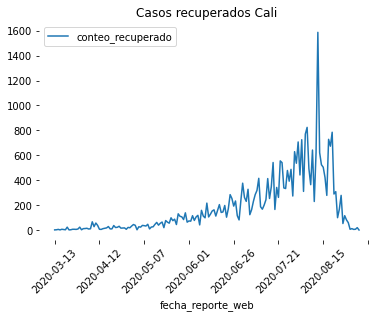

In [150]:
ax=data_cali_recuperados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos recuperados Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [151]:
arima_model_cali_recuperados= auto_arima(data_cali_recuperados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2243.813, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2162.553, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=2079.925, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=2135.351, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=2078.055, Time=0.36 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=2078.614, Time=0.97 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=inf, Time=2.15 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=0.23 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,2)(0,1,2)[7]             : AIC=2073.394, Time=1.49 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=2070.034, Time=0.58 sec
 A

In [152]:
arima_model_cali_recuperados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  171
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 7)   Log Likelihood               -1030.017
Date:                             Sat, 05 Sep 2020   AIC                           2070.034
Time:                                     15:21:36   BIC                           2085.503
Sample:                                          0   HQIC                          2076.315
                                             - 171                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8192      0.096      8.527      0.000       0.631       1.008
ma.L1         -1.7415      0.074    -23.602      0.000      -1.886      -1.597
ma.L2          0.8422      0.054     15.670      0.000       0.737       0.948
ma.S.L7       -0.8687      0.037    -23.285      0.000      -0.942      -0.796
sigma2        1.7e+04    954.200     17.820      0.000    1.51e+04    1.89e+04
===================================================================================
Ljung-Box (Q):                       44.62   Jarque-Bera (JB):              2370.50
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):             177.07   Skew:                             1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [154]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [155]:
prediction_cali_recuperados_corto = pd.DataFrame(arima_model_cali_recuperados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cali_recuperados_corto.columns=['pred_casos_recuperados_cali_corto']
prediction_cali_recuperados_corto= pd.DataFrame(prediction_cali_recuperados_corto)

In [156]:
data_cali_recuperados.index = pd.to_datetime(data_cali_recuperados.index)

In [157]:
arima_model_cali_recuperados.order

(1, 1, 2)

In [158]:
prediction_cali_recuperados_corto[prediction_cali_recuperados_corto < 0] = 0

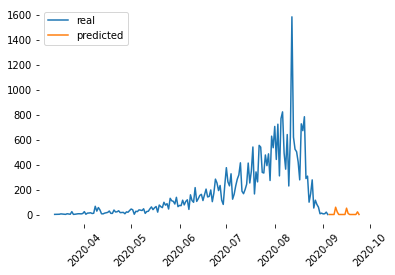

In [159]:
fig, ax = plt.subplots()
plt.plot(data_cali_recuperados, label='real')
plt.plot(prediction_cali_recuperados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [160]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cali_recuperados.order ,",  es decir, con", arima_model_cali_recuperados.order[0], " períodos para modelo autorregresivo, con ", arima_model_cali_recuperados.order[1], "diferenciación de la serie, y con ", arima_model_cali_recuperados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cali_recuperados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cali_recuperados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 2) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  2  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


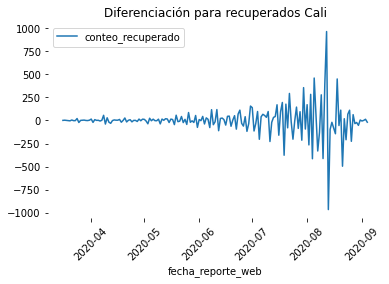

In [161]:
data_cali_recuperados_diff = data_cali_recuperados.diff(periods=1)
ax=data_cali_recuperados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para recuperados Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Fallecidos**

In [162]:
data_cali_fallecidos = data_cali[['fecha_reporte_web','conteo_fallecidos']]

In [163]:
data_cali_fallecidos = data_cali_fallecidos.set_index('fecha_reporte_web')

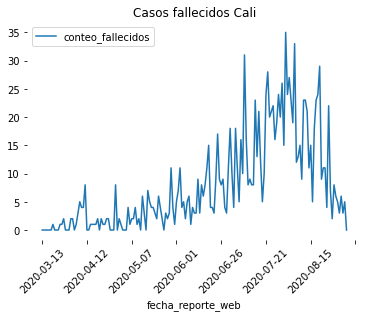

In [164]:
ax=data_cali_fallecidos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos fallecidos Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [165]:
arima_model_cali_fallecidos= auto_arima(data_cali_fallecidos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1166.972, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1089.157, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1000.846, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1074.547, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1002.834, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=1002.826, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1043.869, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1004.090, Time=0.51 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1071.885, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=1002.804, Time=0.14 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=1002.801, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=1031.329, Time=0.10 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=1000.778, Time=0.47 sec
 ARIMA(1,1,2)(0,1,0)[7]             : AIC=1077.849, Time=0.12 sec
 ARIMA(1,1,2)(1,1,1)[7]          

In [166]:
arima_model_cali_fallecidos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  171
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -495.389
Date:                             Sat, 05 Sep 2020   AIC                           1000.778
Time:                                     15:21:46   BIC                           1016.247
Sample:                                          0   HQIC                          1007.059
                                             - 171                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9811      0.062     15.745      0.000       0.859       1.103
ma.L1         -1.8081      0.052    -34.444      0.000      -1.911      -1.705
ma.L2          0.8275      0.042     19.472      0.000       0.744       0.911
ma.S.L7       -0.8559      0.046    -18.443      0.000      -0.947      -0.765
sigma2        24.1045      1.989     12.117      0.000      20.206      28.003
===================================================================================
Ljung-Box (Q):                       59.27   Jarque-Bera (JB):                23.18
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               9.66   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [168]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [169]:
prediction_cali_fallecidos_corto = pd.DataFrame(arima_model_cali_fallecidos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cali_fallecidos_corto.columns=['pred_casos_fallecidos_cali_corto']
prediction_cali_fallecidos_corto= pd.DataFrame(prediction_cali_fallecidos_corto)

In [170]:
data_cali_fallecidos.index = pd.to_datetime(data_cali_fallecidos.index)

In [171]:
arima_model_cali_fallecidos.order

(1, 1, 2)

In [172]:
prediction_cali_fallecidos_corto[prediction_cali_fallecidos_corto < 0] = 0

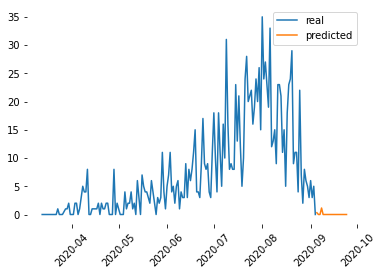

In [173]:
fig, ax = plt.subplots()
plt.plot(data_cali_fallecidos, label='real')
plt.plot(prediction_cali_fallecidos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [174]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cali_fallecidos.order ,",  es decir, con", arima_model_cali_fallecidos.order[0], " períodos para modelo autorregresivo, con ", arima_model_cali_fallecidos.order[1], "diferenciación de la serie, y con ", arima_model_cali_fallecidos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cali_fallecidos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cali_fallecidos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 2) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  2  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


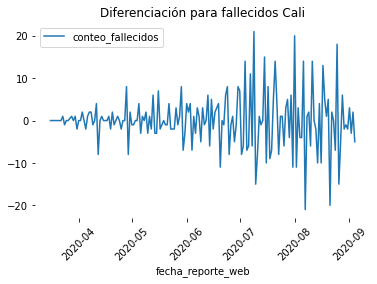

In [175]:
data_cali_fallecidos_diff = data_cali_fallecidos.diff(periods=1)
ax=data_cali_fallecidos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para fallecidos Cali")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

## **Ciudad Cartagena de Indias**

### **Casos Activos**

In [176]:
data_cartagena = data[data['ciudad_de_ubicaci_n']=='Cartagena de Indias']

In [177]:
data_cartagena_activos = data_cartagena[['fecha_reporte_web','casos_activos']]

In [178]:
data_cartagena_activos = data_cartagena_activos.set_index('fecha_reporte_web')

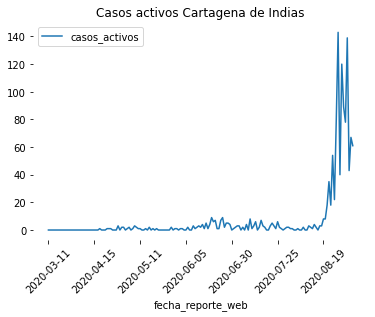

In [179]:
ax=data_cartagena_activos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos activos Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [180]:
arima_model_cartagena_activos= auto_arima(data_cartagena_activos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1428.883, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1301.625, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1287.290, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1367.204, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1281.189, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1297.119, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=1281.975, Time=0.30 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1281.786, Time=1.01 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=1279.835, Time=0.20 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=1281.766, Time=0.56 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=1283.648, Time=1.29 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=1354.371, Time=0.16 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=1254.707, Time=0.35 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,1)(1,1,2)[7]             : 

In [181]:
arima_model_cartagena_activos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  167
Model:             SARIMAX(5, 1, 0)x(0, 1, [1, 2], 7)   Log Likelihood                -584.733
Date:                                Sat, 05 Sep 2020   AIC                           1185.466
Time:                                        15:22:28   BIC                           1210.017
Sample:                                             0   HQIC                          1195.436
                                                - 167                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6233      0.044    -14.026      0.000      -0.710      -0.536
ar.L2         -0.1370      0.081     -1.690      0.091      -0.296       0.022
ar.L3          0.3559      0.112      3.166      0.002       0.136       0.576
ar.L4          0.0892      0.126      0.706      0.480      -0.158       0.337
ar.L5          0.4124      0.188      2.198      0.028       0.045       0.780
ma.S.L7       -1.3846      0.213     -6.512      0.000      -1.801      -0.968
ma.S.L14       0.5403      0.198      2.722      0.006       0.151       0.929
sigma2        80.7524      7.463     10.820      0.000      66.124      95.380
===================================================================================
Ljung-Box (Q):                       26.68   Jarque-Bera (JB):              8383.22
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):             210.82   Skew:                             3.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [182]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [183]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [184]:
prediction_cartagena_activos_corto = pd.DataFrame(arima_model_cartagena_activos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cartagena_activos_corto.columns=['pred_casos_activos_cartagena_corto']
prediction_cartagena_activos_corto= pd.DataFrame(prediction_cartagena_activos_corto)
prediction_cartagena_activos_corto

,pred_casos_activos_cartagena_corto
fecha_pred,
2020-09-05,31.129945
2020-09-06,77.279919
2020-09-07,16.196870
2020-09-08,44.953554
2020-09-09,55.247701
2020-09-10,37.246099
2020-09-11,78.870231
2020-09-12,39.583195
2020-09-13,60.864769


In [185]:
data_cartagena_activos.index = pd.to_datetime(data_cartagena_activos.index)

In [186]:
arima_model_cartagena_activos.order

(5, 1, 0)

In [187]:
prediction_cartagena_activos_corto[prediction_cartagena_activos_corto < 0] = 0

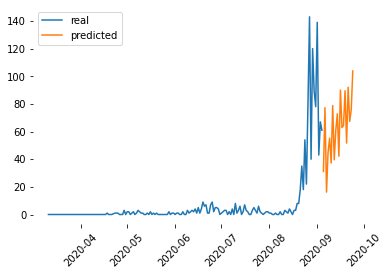

In [188]:
fig, ax = plt.subplots()
plt.plot(data_cartagena_activos, label='real')
plt.plot(prediction_cartagena_activos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.show()

In [189]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cartagena_activos.order ,",  es decir, con", arima_model_cartagena_activos.order[0], " períodos para modelo autorregresivo, con ", arima_model_cartagena_activos.order[1], "diferenciación de la serie, y con ", arima_model_cartagena_activos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cartagena_activos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cartagena_activos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (5, 1, 0) ,  es decir, con 5  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  0  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


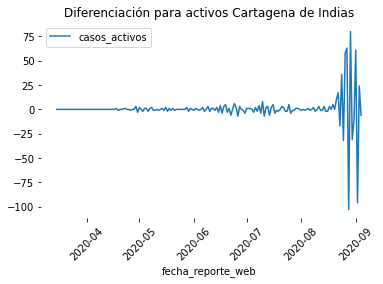

In [190]:
data_cartagena_activos_diff = data_cartagena_activos.diff(periods=1)
ax=data_cartagena_activos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para activos Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Confirmados**

In [191]:
data_cartagena_confirmados = data_cartagena[['fecha_reporte_web','conteo_confirmados']]

In [192]:
data_cartagena_confirmados = data_cartagena_confirmados.set_index('fecha_reporte_web')

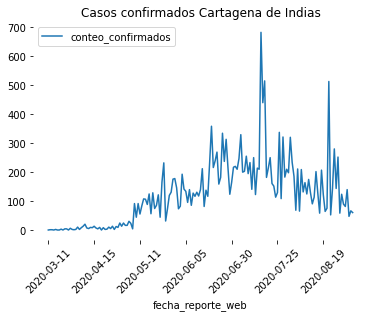

In [193]:
ax=data_cartagena_confirmados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos confirmados Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [194]:
arima_model_cartagena_confirmados= auto_arima(data_cartagena_confirmados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2031.497, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1922.487, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1859.740, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1960.410, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1855.867, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1898.872, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=1856.478, Time=0.82 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=1854.805, Time=0.29 sec
 ARIMA(0,1,1)(0,1,3)[7]             : AIC=1856.614, Time=1.28 sec
 ARIMA(0,1,1)(1,1,3)[7]             : AIC=inf, Time=2.01 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=1928.915, Time=0.23 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=1856.805, Time=0.62 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=1856.805, Time=0.38 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=1

In [195]:
arima_model_cartagena_confirmados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  167
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -923.403
Date:                                Sat, 05 Sep 2020   AIC                           1854.805
Time:                                        15:22:38   BIC                           1867.081
Sample:                                             0   HQIC                          1859.790
                                                - 167                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7934      0.038    -20.965      0.000      -0.868      -0.719
ma.S.L7       -1.0408      0.063    -16.640      0.000      -1.163      -0.918
ma.S.L14       0.2587      0.056      4.614      0.000       0.149       0.369
sigma2      6079.0855    335.339     18.128      0.000    5421.834    6736.337
===================================================================================
Ljung-Box (Q):                       46.19   Jarque-Bera (JB):               483.53
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):              34.16   Skew:                             1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [197]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [198]:
prediction_cartagena_confirmados_corto = pd.DataFrame(arima_model_cartagena_confirmados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cartagena_confirmados_corto.columns=['pred_casos_confirmados_cartagena_corto']
prediction_cartagena_confirmados_corto= pd.DataFrame(prediction_cartagena_confirmados_corto)

In [199]:
data_cartagena_confirmados.index = pd.to_datetime(data_cartagena_confirmados.index)

In [200]:
arima_model_cartagena_confirmados.order

(0, 1, 1)

In [201]:
prediction_cartagena_confirmados_corto[prediction_cartagena_confirmados_corto < 0] = 0

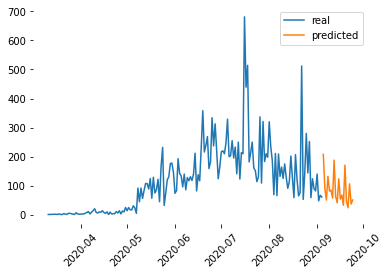

In [202]:
fig, ax = plt.subplots()
plt.plot(data_cartagena_confirmados, label='real')
plt.plot(prediction_cartagena_confirmados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [203]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cartagena_confirmados.order ,",  es decir, con", arima_model_cartagena_confirmados.order[0], " períodos para modelo autorregresivo, con ", arima_model_cartagena_confirmados.order[1], "diferenciación de la serie, y con ", arima_model_cartagena_confirmados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cartagena_confirmados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cartagena_confirmados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (0, 1, 1) ,  es decir, con 0  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


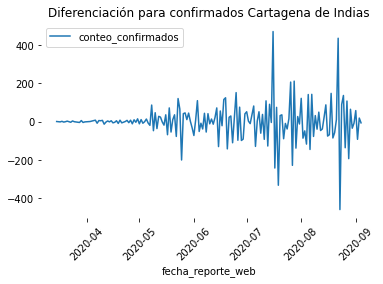

In [204]:
data_cartagena_confirmados_diff = data_cartagena_confirmados.diff(periods=1)
ax=data_cartagena_confirmados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para confirmados Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Recuperados**

In [205]:
data_cartagena_recuperados = data_cartagena[['fecha_reporte_web','conteo_recuperado']]

In [206]:
data_cartagena_recuperados = data_cartagena_recuperados.set_index('fecha_reporte_web')

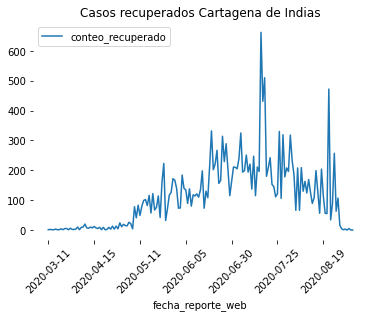

In [207]:
ax=data_cartagena_recuperados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos recuperados Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [208]:
arima_model_cartagena_recuperados= auto_arima(data_cartagena_recuperados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2027.157, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1916.682, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1853.976, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=1956.773, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=1848.717, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=1892.574, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=1848.680, Time=0.49 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=1862.875, Time=0.25 sec
 ARIMA(0,1,1)(3,1,1)[7]             : AIC=inf, Time=1.54 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=1850.453, Time=0.73 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=1848.701, Time=0.80 sec
 ARIMA(0,1,1)(3,1,0)[7]             : AIC=1854.775, Time=0.61 sec
 ARIMA(0,1,1)(3,1,2)[7]             : AIC=1852.450, Time=2.31 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=1920.369, Time=0.42 sec
 ARIMA(1,1,1)(2,1,1)[7]             : 

In [209]:
arima_model_cartagena_recuperados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  167
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 7)   Log Likelihood                -919.340
Date:                           Sat, 05 Sep 2020   AIC                           1848.680
Time:                                   15:22:51   BIC                           1864.024
Sample:                                        0   HQIC                          1854.911
                                           - 167                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7791      0.041    -19.034      0.000      -0.859      -0.699
ar.S.L7       -0.4084      0.089     -4.599      0.000      -0.582      -0.234
ar.S.L14      -0.1702      0.063     -2.706      0.007      -0.294      -0.047
ma.S.L7       -0.6481      0.100     -6.476      0.000      -0.844      -0.452
sigma2      5773.3765    324.970     17.766      0.000    5136.447    6410.305
===================================================================================
Ljung-Box (Q):                       43.09   Jarque-Bera (JB):               403.58
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):              38.24   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [210]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [211]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [212]:
prediction_cartagena_recuperados_corto = pd.DataFrame(arima_model_cartagena_recuperados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cartagena_recuperados_corto.columns=['pred_casos_recuperados_cartagena_corto']
prediction_cartagena_recuperados_corto= pd.DataFrame(prediction_cartagena_recuperados_corto)

In [213]:
data_cartagena_recuperados.index = pd.to_datetime(data_cartagena_recuperados.index)

In [214]:
arima_model_cartagena_recuperados.order

(0, 1, 1)

In [215]:
prediction_cartagena_recuperados_corto[prediction_cartagena_recuperados_corto < 0] = 0

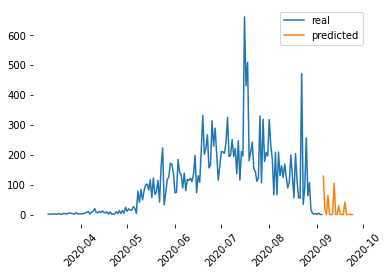

In [216]:
fig, ax = plt.subplots()
plt.plot(data_cartagena_recuperados, label='real')
plt.plot(prediction_cartagena_recuperados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [217]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cartagena_recuperados.order ,",  es decir, con", arima_model_cartagena_recuperados.order[0], " períodos para modelo autorregresivo, con ", arima_model_cartagena_recuperados.order[1], "diferenciación de la serie, y con ", arima_model_cartagena_recuperados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cartagena_recuperados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cartagena_recuperados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (0, 1, 1) ,  es decir, con 0  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


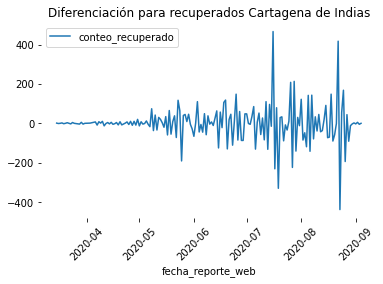

In [218]:
data_cartagena_recuperados_diff = data_cartagena_recuperados.diff(periods=1)
ax=data_cartagena_recuperados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para recuperados Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Fallecidos**

In [219]:
data_cartagena_fallecidos = data_cartagena[['fecha_reporte_web','conteo_fallecidos']]

In [220]:
data_cartagena_fallecidos = data_cartagena_fallecidos.set_index('fecha_reporte_web')

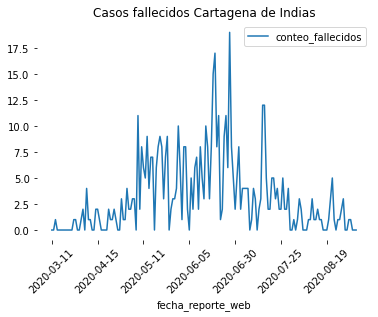

In [221]:
ax=data_cartagena_fallecidos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos fallecidos Cartagena de Indias")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [222]:
arima_model_cartagena_fallecidos= auto_arima(data_cartagena_fallecidos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=971.989, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=915.396, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=946.765, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=885.869, Time=0.10 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=876.808, Time=0.25 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=870.223, Time=0.42 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=866.909, Time=0.61 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=865.588, Time=1.65 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=2.81 sec
 ARIMA(1,1,0)(5,1,2)[7]             : AIC=866.673, Time=2.59 sec
 ARIMA(1,1,0)(4,1,2)[7]             : AIC=inf, Time=2.09 sec
 ARIMA(0,1,0)(5,1,1)[7]             : AIC=881.748, Time=1.53 sec
 ARIMA(2,1,0)(5,1,1)[7]             : AIC=851.810, Time=2.05 sec
 ARIMA(2,1,0)(4,1,1)[7]             : AIC=inf, Time=2.39 se

In [223]:
arima_model_cartagena_fallecidos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  167
Model:             SARIMAX(4, 1, 1)x(5, 1, 1, 7)   Log Likelihood                -402.464
Date:                           Sat, 05 Sep 2020   AIC                            828.929
Time:                                   15:25:21   BIC                            865.755
Sample:                                        0   HQIC                           843.884
                                           - 167                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0495      0.135      0.366      0.714      -0.216       0.315
ar.L2         -0.2050      0.106     -1.939      0.052      -0.412       0.002
ar.L3         -0.1040      0.089     -1.174      0.240      -0.278       0.070
ar.L4         -0.1950      0.107     -1.831      0.067      -0.404       0.014
ma.L1         -0.6942      0.114     -6.098      0.000      -0.917      -0.471
ar.S.L7       -1.4253      0.279     -5.114      0.000      -1.972      -0.879
ar.S.L14      -1.3094      0.251     -5.224      0.000      -1.801      -0.818
ar.S.L21      -1.0815      0.240     -4.513      0.000      -1.551      -0.612
ar.S.L28      -0.6712      0.186     -3.618      0.000      -1.035      -0.308
ar.S.L35      -0.3150      0.079     -4.012      0.000      -0.469      -0.161
ma.S.L7        0.5895      0.292      2.018      0.044       0.017       1.162
sigma2         8.6132      0.838     10.273      0.000       6.970      10.256
===================================================================================
Ljung-Box (Q):                       49.40   Jarque-Bera (JB):                15.36
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.36
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [225]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [226]:
prediction_cartagena_fallecidos_corto = pd.DataFrame(arima_model_cartagena_fallecidos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_cartagena_fallecidos_corto.columns=['pred_casos_fallecidos_cartagena_corto']
prediction_cartagena_fallecidos_corto= pd.DataFrame(prediction_cartagena_fallecidos_corto)

In [227]:
data_cartagena_fallecidos.index = pd.to_datetime(data_cartagena_fallecidos.index)

In [228]:
arima_model_cartagena_fallecidos.order

(4, 1, 1)

In [229]:
prediction_cartagena_fallecidos_corto[prediction_cartagena_fallecidos_corto< 0] = 0

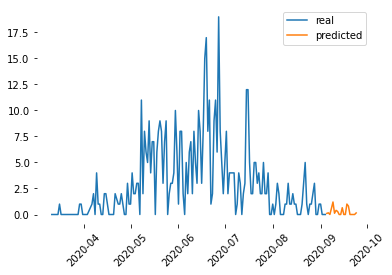

In [230]:
fig, ax = plt.subplots()
plt.plot(data_cartagena_fallecidos, label='real')
plt.plot(prediction_cartagena_fallecidos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [231]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_cartagena_fallecidos.order ,",  es decir, con", arima_model_cartagena_fallecidos.order[0], " períodos para modelo autorregresivo, con ", arima_model_cartagena_fallecidos.order[1], "diferenciación de la serie, y con ", arima_model_cartagena_fallecidos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_cartagena_fallecidos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_cartagena_fallecidos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (4, 1, 1) ,  es decir, con 4  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


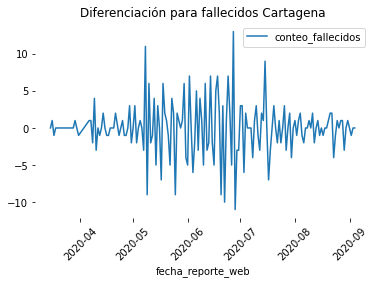

In [232]:
data_cartagena_fallecidos_diff = data_cartagena_fallecidos.diff(periods=1)
ax=data_cartagena_fallecidos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para fallecidos Cartagena")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

## **Ciudad Barranquilla**

### **Casos Activos**

In [233]:
data_barranquilla = data[data['ciudad_de_ubicaci_n']=='Barranquilla']

In [234]:
data_barranquilla_activos = data_barranquilla[['fecha_reporte_web','casos_activos']]

In [235]:
data_barranquilla_activos = data_barranquilla_activos.set_index('fecha_reporte_web')

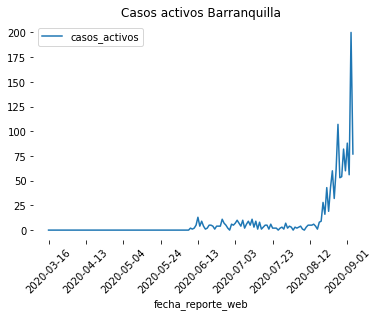

In [236]:
ax=data_barranquilla_activos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos activos Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [237]:
arima_model_barranquilla_activos= auto_arima(data_barranquilla_activos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1305.768, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1170.216, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=1180.975, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1168.659, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=1170.222, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=1172.215, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[7]             : AIC=1132.721, Time=0.03 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=1126.077, Time=0.08 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=1127.556, Time=0.14 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=1127.675, Time=0.18 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=1127.245, Time=0.08 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=1129.500, Time=0.27 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=1125.535, Time=0.09 sec
 ARIMA(3,1,0)(0,1,0)[7]             : AIC=1134.699, Time=0.04 sec
 ARIMA(3,1,0)(2,1,0)[7]          

In [238]:
arima_model_barranquilla_activos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  164
Model:             SARIMAX(5, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -548.898
Date:                             Sat, 05 Sep 2020   AIC                           1115.796
Time:                                     15:25:42   BIC                           1143.244
Sample:                                          0   HQIC                          1126.944
                                             - 164                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2800      0.117      2.400      0.016       0.051       0.509
ar.L2          0.5640      0.088      6.379      0.000       0.391       0.737
ar.L3          0.1336      0.094      1.419      0.156      -0.051       0.318
ar.L4         -0.6069      0.090     -6.764      0.000      -0.783      -0.431
ar.L5         -0.1871      0.068     -2.769      0.006      -0.319      -0.055
ma.L1         -1.4428      0.144    -10.047      0.000      -1.724      -1.161
ma.L2          0.6585      0.146      4.520      0.000       0.373       0.944
ma.S.L7        0.4862      0.062      7.898      0.000       0.366       0.607
sigma2        65.0113      3.508     18.530      0.000      58.135      71.888
===================================================================================
Ljung-Box (Q):                        7.96   Jarque-Bera (JB):              1709.75
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                             2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [240]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [241]:
prediction_barranquilla_activos_corto = pd.DataFrame(arima_model_barranquilla_activos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_barranquilla_activos_corto.columns=['pred_casos_activos_barranquilla_corto']
prediction_barranquilla_activos_corto= pd.DataFrame(prediction_barranquilla_activos_corto)

In [242]:
data_barranquilla_activos.index = pd.to_datetime(data_barranquilla_activos.index)

In [243]:
arima_model_barranquilla_activos.order

(5, 1, 2)

In [244]:
prediction_barranquilla_activos_corto[prediction_barranquilla_activos_corto < 0] = 0

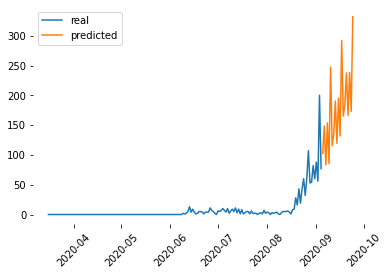

In [245]:
fig, ax = plt.subplots()
plt.plot(data_barranquilla_activos, label='real')
plt.plot(prediction_barranquilla_activos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [246]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_barranquilla_activos.order ,",  es decir, con", arima_model_barranquilla_activos.order[0], " períodos para modelo autorregresivo, con ", arima_model_barranquilla_activos.order[1], "diferenciación de la serie, y con ", arima_model_barranquilla_activos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_barranquilla_activos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_barranquilla_activos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (5, 1, 2) ,  es decir, con 5  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  2  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


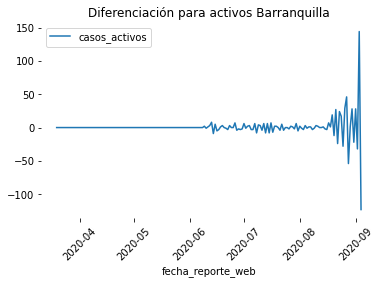

In [247]:
data_barranquilla_activos_diff = data_barranquilla_activos.diff(periods=1)
ax=data_barranquilla_activos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para activos Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Confirmados**

In [248]:
data_barranquilla_confirmados = data_barranquilla[['fecha_reporte_web','conteo_confirmados']]

In [249]:
data_barranquilla_confirmados = data_barranquilla_confirmados.set_index('fecha_reporte_web')

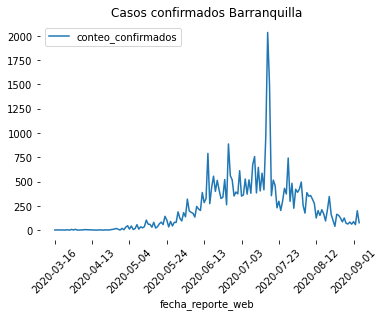

In [250]:
ax=data_barranquilla_confirmados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos confirmados Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [251]:
arima_model_barranquilla_confirmados= auto_arima(data_barranquilla_confirmados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2205.527, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2157.184, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2196.482, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2126.575, Time=0.20 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=2122.635, Time=0.34 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=2122.248, Time=0.55 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=2121.816, Time=0.94 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=3.62 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=2.63 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=2129.620, Time=0.70 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=2115.306, Time=1.20 sec
 ARIMA(2,1,0)(4,1,0)[7]             : AIC=2116.628, Time=0.61 sec
 ARIMA(2,1,0)(5,1,1)[7]             : AIC=inf, Time=4.89 sec
 ARIMA(2,1,0)(4,1,1)[7]             : AIC=inf, Time=3

In [252]:
arima_model_barranquilla_confirmados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(1, 1, 1)x(4, 1, [], 7)   Log Likelihood               -1041.812
Date:                            Sat, 05 Sep 2020   AIC                           2097.625
Time:                                    15:28:59   BIC                           2118.974
Sample:                                         0   HQIC                          2106.296
                                            - 164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4160      0.089      4.650      0.000       0.241       0.591
ma.L1         -0.8934      0.053    -16.821      0.000      -0.997      -0.789
ar.S.L7       -0.8007      0.051    -15.829      0.000      -0.900      -0.702
ar.S.L14      -0.6021      0.083     -7.214      0.000      -0.766      -0.439
ar.S.L21      -0.2662      0.101     -2.638      0.008      -0.464      -0.068
ar.S.L28      -0.1116      0.106     -1.048      0.295      -0.320       0.097
sigma2       3.54e+04   2298.150     15.402      0.000    3.09e+04    3.99e+04
===================================================================================
Ljung-Box (Q):                       47.58   Jarque-Bera (JB):               630.76
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):             155.96   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [253]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [254]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [255]:
prediction_barranquilla_confirmados_corto = pd.DataFrame(arima_model_barranquilla_confirmados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_barranquilla_confirmados_corto.columns=['pred_casos_confirmados_barranquilla_corto']
prediction_barranquilla_confirmados_corto= pd.DataFrame(prediction_barranquilla_confirmados_corto)

In [256]:
data_barranquilla_confirmados.index = pd.to_datetime(data_barranquilla_confirmados.index)

In [257]:
arima_model_barranquilla_confirmados.order

(1, 1, 1)

In [258]:
prediction_barranquilla_confirmados_corto[prediction_barranquilla_confirmados_corto < 0] = 0

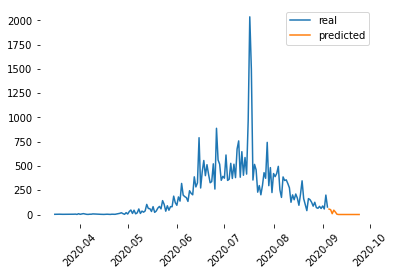

In [259]:
fig, ax = plt.subplots()
plt.plot(data_barranquilla_confirmados, label='real')
plt.plot(prediction_barranquilla_confirmados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [260]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_barranquilla_confirmados.order ,",  es decir, con", arima_model_barranquilla_confirmados.order[0], " períodos para modelo autorregresivo, con ", arima_model_barranquilla_confirmados.order[1], "diferenciación de la serie, y con ", arima_model_barranquilla_confirmados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_barranquilla_confirmados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_barranquilla_confirmados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 1) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


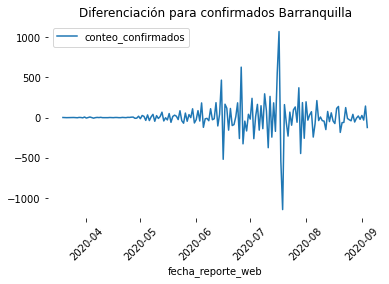

In [261]:
data_barranquilla_confirmados_diff = data_barranquilla_confirmados.diff(periods=1)
ax=data_barranquilla_confirmados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para confirmados Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Recuperados**

In [262]:
data_barranquilla_recuperados = data_barranquilla[['fecha_reporte_web','conteo_recuperado']]

In [263]:
data_barranquilla_recuperados = data_barranquilla_recuperados.set_index('fecha_reporte_web')

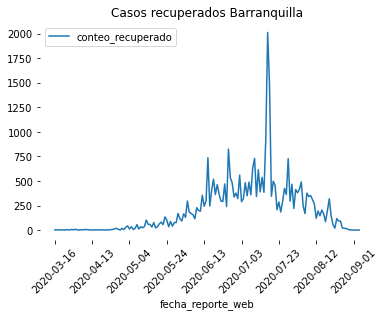

In [264]:
ax=data_barranquilla_recuperados.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos recuperados Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [265]:
arima_model_barranquilla_recuperados= auto_arima(data_barranquilla_recuperados, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2198.876, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2152.622, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2191.754, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2120.752, Time=0.16 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=2116.182, Time=0.27 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=2116.147, Time=0.51 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=2115.485, Time=0.90 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=3.81 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=2.29 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=2121.800, Time=0.80 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=2108.331, Time=1.21 sec
 ARIMA(2,1,0)(4,1,0)[7]             : AIC=2109.784, Time=0.78 sec
 ARIMA(2,1,0)(5,1,1)[7]             : AIC=inf, Time=6.05 sec
 ARIMA(2,1,0)(4,1,1)[7]             : AIC=inf, Time=3

In [266]:
arima_model_barranquilla_recuperados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 7)   Log Likelihood               -1039.243
Date:                            Sat, 05 Sep 2020   AIC                           2090.486
Time:                                    15:31:39   BIC                           2108.785
Sample:                                         0   HQIC                          2097.918
                                            - 164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4321      0.083      5.194      0.000       0.269       0.595
ma.L1         -0.9058      0.051    -17.594      0.000      -1.007      -0.805
ar.S.L7       -0.7789      0.048    -16.236      0.000      -0.873      -0.685
ar.S.L14      -0.5447      0.061     -8.869      0.000      -0.665      -0.424
ar.S.L21      -0.1788      0.061     -2.938      0.003      -0.298      -0.060
sigma2      3.429e+04   2075.224     16.524      0.000    3.02e+04    3.84e+04
===================================================================================
Ljung-Box (Q):                       45.62   Jarque-Bera (JB):               813.49
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):             169.68   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [268]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [269]:
prediction_barranquilla_recuperados_corto = pd.DataFrame(arima_model_barranquilla_recuperados.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_barranquilla_recuperados_corto.columns=['pred_casos_recuperados_barranquilla_corto']
prediction_barranquilla_recuperados_corto= pd.DataFrame(prediction_barranquilla_recuperados_corto)

In [270]:
data_barranquilla_recuperados.index = pd.to_datetime(data_barranquilla_recuperados.index)

In [271]:
arima_model_barranquilla_recuperados.order

(1, 1, 1)

In [272]:
prediction_barranquilla_recuperados_corto[prediction_barranquilla_recuperados_corto < 0] = 0

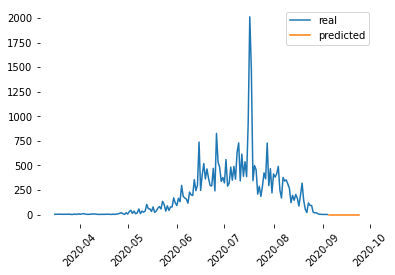

In [273]:
fig, ax = plt.subplots()
plt.plot(data_barranquilla_recuperados, label='real')
plt.plot(prediction_barranquilla_recuperados_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [274]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_barranquilla_recuperados.order ,",  es decir, con", arima_model_barranquilla_recuperados.order[0], " períodos para modelo autorregresivo, con ", arima_model_barranquilla_recuperados.order[1], "diferenciación de la serie, y con ", arima_model_barranquilla_recuperados.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_barranquilla_recuperados.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_barranquilla_recuperados.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 1) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


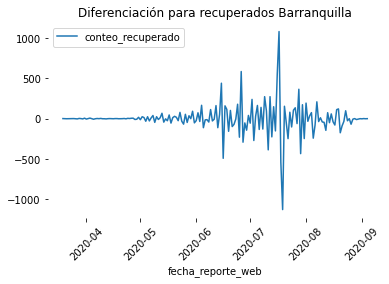

In [275]:
data_barranquilla_recuperados_diff = data_barranquilla_recuperados.diff(periods=1)
ax=data_barranquilla_recuperados_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para recuperados Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Casos Fallecidos**

In [276]:
data_barranquilla_fallecidos = data_barranquilla[['fecha_reporte_web','conteo_fallecidos']]

In [277]:
data_barranquilla_fallecidos = data_barranquilla_fallecidos.set_index('fecha_reporte_web')

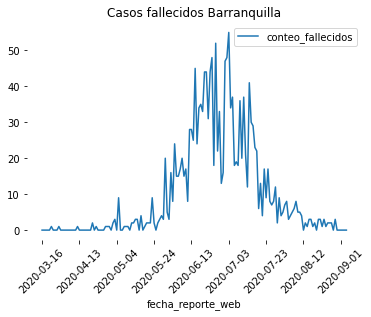

In [278]:
ax=data_barranquilla_fallecidos.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Casos fallecidos Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [279]:
arima_model_barranquilla_fallecidos= auto_arima(data_barranquilla_fallecidos, start_p=0, d=1, start_q=0, max_p=5, max_d=5,max_q=5, start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=7, seasonal=True, error_action='warn',trace = True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1230.850, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1133.524, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1168.156, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1110.315, Time=0.14 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=1109.048, Time=0.20 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=1106.347, Time=0.41 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=1102.392, Time=0.69 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=3.35 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=2.20 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=1163.049, Time=0.60 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=1099.233, Time=0.86 sec
 ARIMA(2,1,0)(4,1,0)[7]             : AIC=1103.734, Time=0.42 sec
 ARIMA(2,1,0)(5,1,1)[7]             : AIC=inf, Time=4.54 sec
 ARIMA(2,1,0)(4,1,1)[7]             : AIC=inf, Time=3

In [280]:
arima_model_barranquilla_fallecidos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  164
Model:             SARIMAX(1, 1, 1)x(5, 1, [], 7)   Log Likelihood                -541.327
Date:                            Sat, 05 Sep 2020   AIC                           1098.654
Time:                                    15:32:18   BIC                           1123.053
Sample:                                         0   HQIC                          1108.563
                                            - 164                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2902      0.084     -3.435      0.001      -0.456      -0.125
ma.L1         -0.4311      0.070     -6.140      0.000      -0.569      -0.293
ar.S.L7       -0.7110      0.049    -14.592      0.000      -0.806      -0.615
ar.S.L14      -0.5602      0.073     -7.692      0.000      -0.703      -0.417
ar.S.L21      -0.3561      0.106     -3.373      0.001      -0.563      -0.149
ar.S.L28      -0.2856      0.124     -2.304      0.021      -0.528      -0.043
ar.S.L35      -0.1862      0.105     -1.773      0.076      -0.392       0.020
sigma2        58.0567      5.118     11.343      0.000      48.025      68.088
===================================================================================
Ljung-Box (Q):                       70.22   Jarque-Bera (JB):                52.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.51   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [281]:
date_delta = datetime.today() 
date_delta = date_delta.strftime('%Y-%m-%d')
date_delta

'2020-09-05'

In [282]:
fechas_pred_corto= pd.date_range(start=date_delta,periods=20)
fechas_pred_corto = pd.DataFrame(fechas_pred_corto)
fechas_pred_corto.columns = ['fecha_pred'] 
fechas_pred_corto = fechas_pred_corto.set_index('fecha_pred')

In [283]:
prediction_barranquilla_fallecidos_corto = pd.DataFrame(arima_model_barranquilla_fallecidos.predict(n_periods=20), index=fechas_pred_corto.index)
prediction_barranquilla_fallecidos_corto.columns=['pred_casos_fallecidos_barranquilla_corto']
prediction_barranquilla_fallecidos_corto= pd.DataFrame(prediction_barranquilla_fallecidos_corto)

In [284]:
data_barranquilla_fallecidos.index = pd.to_datetime(data_barranquilla_fallecidos.index)

In [285]:
arima_model_barranquilla_fallecidos.order

(1, 1, 1)

In [286]:
prediction_barranquilla_fallecidos_corto[prediction_barranquilla_fallecidos_corto < 0] = 0

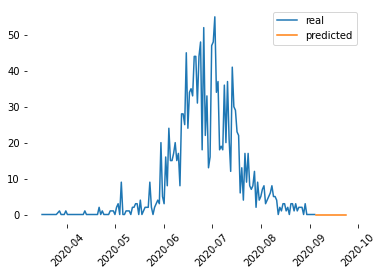

In [287]:
fig, ax = plt.subplots()
plt.plot(data_barranquilla_fallecidos, label='real')
plt.plot(prediction_barranquilla_fallecidos_corto, label = 'predicted')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

In [288]:
print("Para esta serie se ajustó un modelo ARIMA " ,arima_model_barranquilla_fallecidos.order ,",  es decir, con", arima_model_barranquilla_fallecidos.order[0], " períodos para modelo autorregresivo, con ", arima_model_barranquilla_fallecidos.order[1], "diferenciación de la serie, y con ", arima_model_barranquilla_fallecidos.order[2], " período del modelo de media móvil. Basta con diferenciar ", arima_model_barranquilla_fallecidos.order[1], "vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con ", arima_model_barranquilla_fallecidos.order[1], "diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.")

Para esta serie se ajustó un modelo ARIMA  (1, 1, 1) ,  es decir, con 1  períodos para modelo autorregresivo, con  1 diferenciación de la serie, y con  1  período del modelo de media móvil. Basta con diferenciar  1 vez la serie original para que ésta se convierta en estacionaria como se muestra en la siguiente gráfica. Por lo tanto, el modelo con  1 diferenciación que escogió el AUTOARIMA es un modelo válido para pronosticar en los datos de interés.


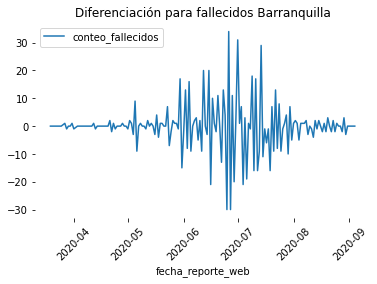

In [289]:
data_barranquilla_fallecidos_diff = data_barranquilla_fallecidos.diff(periods=1)
ax=data_barranquilla_fallecidos_diff.plot()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.title("Diferenciación para fallecidos Barranquilla")
plt.xticks(rotation=45, horizontalalignment="center")
plt.show()

### **Modelo SIR**

El modelo SIR es uno de los modelos epidemiológicos más simples capaces de capturar muchas de las características típicas de los brotes epidémicos. El nombre del modelo proviene de las iniciales S (población susceptible), I (población infectada) y R (población recuperada). El modelo relaciona las variaciones de las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.

Población susceptible (S), individuos sin inmunidad al agente infeccioso, y que por tanto puede ser infectada si es expuesta al agente infeccioso.
Población infectada (I), individuos que están infectados en un momento dado y pueden transmitir la infección a individuos de la población susceptible con la que entran en contacto.
Población recuperada y fallecidos (R), individuos que son inmunes a la infección (o fallecidos), y consecuentemente no afectan a la transmisión cuando entran en contacto con otros individuos.

La metodología empleada para la predicción a través del modelo SIR consiste en realizar el cálculo de la tasa de contagios y de la tasa de recuperados mediante los datos históricos del comportamiento de la enfermedad, obtenidos de la plataforma de datos abiertos de Colombia.  

Este análisis tiene como alcance las cinco ciudades principales de Colombia (Bogotá D.C., Medellín, Cali, Cartagena de Indias y Barranquilla).

### **Librerías**

In [290]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

### **Cálculo tasas SIR**

### **Ciudad Medellín**

In [291]:
data_med_sir = data[data['ciudad_de_ubicaci_n']=='Medellín']
data_med_sir['tasa_contagio'] = np.nan

In [292]:
dct = {'Poblacion_total':2427129} #Población ciudad Medellín
data_final_pobl_med = data_med_sir.assign(**dct)

In [293]:
# Cálculo de la tasa de contagios para Medellín sobre el histórico de casos desde el inicio de la pandemia
for index, row in data_final_pobl_med.iterrows(): 
  if index==0:
    valor_inicial=1.7
    data_final_pobl_med['tasa_contagio'].iloc[index]=valor_inicial
  else:
    data_final_pobl_med['tasa_contagio'].iloc[index]=data_final_pobl_med['acumulado_dia_confirmados'].iloc[index]/data_final_pobl_med['acumulado_dia_confirmados'].iloc[index-1]

In [294]:
# Cálculo de la tasa de recuperados para Medellín sobre el histórico de casos desde el inicio de la pandemia
tasa_recup = data_final_pobl_med['acumulado_dia_recuperado']/data_final_pobl_med['acumulado_dia_confirmados'] 
tasa_recup = pd.DataFrame(tasa_recup)
tasa_recup.columns=['tasa_recuperados']

In [295]:
tasa_recup.set_index('tasa_recuperados')

""
tasa_recuperados
1.000000
1.000000
1.000000
1.000000
1.000000
...
0.835378
0.824443
0.812404


In [296]:
data_final_tasas_med = data_final_pobl_med.join(tasa_recup)

In [297]:
#Guardo población inicial en la variable población
poblacion=data_final_tasas_med.at[0,'Poblacion_total']
poblacion

2427129

In [298]:
# Inicialización de las variables de estudio
susceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
susceptibles=[]
susceptibles = np.insert(susceptibles, 0, susceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(data_final_tasas_med['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(data_final_tasas_med['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)

In [299]:
#Promedio movil tasa_contagio para 300 días
for i in range(1,300):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 300 días
for i in range(1,300):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [300]:
# Estimación de las variables del modelo SIR
i=1

for i in range (1,len(data_final_tasas_med)+300):
  if activos[i-1]>=susceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*susceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.07,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    susceptibles=np.insert(susceptibles,i,susceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

In [301]:
## Pasar de array a df
df_m = list(zip(susceptibles,confirmados,total_recuperados,total_muertos,contagios,recuperados,muertos,activos,tasa_contagio,tasa_recuperados))
df_med = pd.DataFrame(df_m)
df_medellin = df_med.rename(index=str, columns={0:'susceptibles',1:'confirmados',2:'total_recuperados',3:'total_muertos',4:'contagios',5:'recuperados',6:'muertos',7:'activos',8:'tasa_contagio',9:'tasa_recuperados'})
df_medellin['fecha'] = pd.date_range(start='03/09/2020', periods=len(df_medellin), freq='d')

#### **Susceptibles y Confirmados**

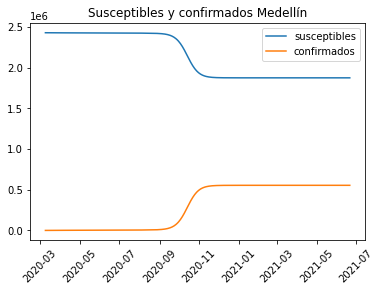

In [302]:
# Gráfico de casos susceptibles y confirmados - Medellín
plt.plot(df_medellin['fecha'],df_medellin['susceptibles'],label='susceptibles')
plt.plot(df_medellin['fecha'],df_medellin['confirmados'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Susceptibles y confirmados Medellín")
plt.legend(loc='best')
plt.show()

#### **Comportamiento**

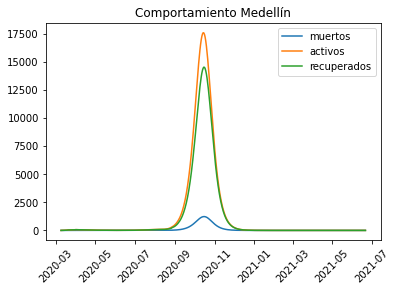

In [303]:
# Gráfico de comportamiento - Medellín
plt.plot(df_medellin['fecha'],df_medellin['muertos'], label='muertos')
plt.plot(df_medellin['fecha'],df_medellin['activos'], label = 'activos')
plt.plot(df_medellin['fecha'],df_medellin['recuperados'], label = 'recuperados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.title("Comportamiento Medellín")
plt.show()

### **Ciudad Bogotá D.C.**

In [304]:
data_bgta_sir = data[data['ciudad_de_ubicaci_n']=='Bogotá D.C.']
data_bgta_sir['tasa_contagio'] = np.nan

In [305]:
dct = {'Poblacion_total':7412566} #Población ciudad Bogotá D.C.
data_final_pobl_bgta = data_bgta_sir.assign(**dct)

In [306]:
data_final_pobl_bgta.reset_index(inplace=True)

In [307]:
# Cálculo de la tasa de contagios para Bogotá D.C. sobre el histórico de casos desde el inicio de la pandemia
for index, row in data_final_pobl_bgta.iterrows():
  if index==0:
    valor_inicial=1.7
    data_final_pobl_bgta['tasa_contagio'].iloc[index]=valor_inicial
  else:
    data_final_pobl_bgta['tasa_contagio'].iloc[index]=data_final_pobl_bgta['acumulado_dia_confirmados'].iloc[index]/data_final_pobl_bgta['acumulado_dia_confirmados'].iloc[index-1]

In [308]:
# Cálculo de la tasa de recuperados para Bogotá D.C. sobre el histórico de casos desde el inicio de la pandemia
tasa_recup_bgta = data_final_pobl_bgta['acumulado_dia_recuperado']/data_final_pobl_bgta['acumulado_dia_confirmados']
tasa_recup_bgta = pd.DataFrame(tasa_recup_bgta)
tasa_recup_bgta.columns=['tasa_recuperados']

In [309]:
tasa_recup_bgta.set_index('tasa_recuperados')

""
tasa_recuperados
1.000000
1.000000
1.000000
1.000000
1.000000
...
0.765892
0.757838
0.747634


In [310]:
data_final_tasas_bgta = data_final_pobl_bgta.join(tasa_recup_bgta)

In [311]:
#Guardo población inicial en la variable población
poblacion=data_final_tasas_bgta.at[0,'Poblacion_total']
poblacion

7412566

In [312]:
# Inicialización de las variables de estudio
susceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
susceptibles=[]
susceptibles = np.insert(susceptibles, 0, susceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(data_final_tasas_bgta['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(data_final_tasas_bgta['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)

In [313]:
#Promedio movil tasa_contagio para 500 días
for i in range(1,500):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 500 días
for i in range(1,500):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [314]:
# Estimación de las variables del modelo SIR
i=1

for i in range (1,len(data_final_tasas_bgta)+500):
  if activos[i-1]>=susceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*susceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.07,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    susceptibles=np.insert(susceptibles,i,susceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

In [315]:
df_b = list(zip(susceptibles,confirmados,total_recuperados,total_muertos,contagios,recuperados,muertos,activos,tasa_contagio,tasa_recuperados))
df_bgta = pd.DataFrame(df_b)
df_bogota =  df_bgta.rename(index=str, columns={0:'susceptibles',1:'confirmados',2:'total_recuperados',3:'total_muertos',4:'contagios',5:'recuperados',6:'muertos',7:'activos',8:'tasa_contagio',9:'tasa_recuperados'})
df_bogota['fecha'] = pd.date_range(start='03/06/2020', periods=len(df_bogota), freq='d')
df_bogota

,susceptibles,confirmados,total_recuperados,total_muertos,contagios,recuperados,muertos,activos,tasa_contagio,tasa_recuperados,fecha
0,7.412566e+06,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,[0.0],[0.0],2020-03-06
1,7.412564e+06,2.700000e+00,1.000000e+00,0.070000,1.700000e+00,1.000000e+00,7.000000e-02,1.630000e+00,[1.7],[1.0],2020-03-07
2,7.412559e+06,7.589999e+00,2.630000e+00,0.184100,4.889999e+00,1.630000e+00,1.141000e-01,4.775899e+00,[3.0],[1.0],2020-03-08
3,7.412551e+06,1.554982e+01,7.405899e+00,0.518413,7.959824e+00,4.775899e+00,3.343129e-01,7.625511e+00,[1.6666666666666667],[1.0],2020-03-09
4,7.412542e+06,2.470042e+01,1.503141e+01,1.052199,9.150596e+00,7.625511e+00,5.337858e-01,8.616810e+00,[1.2],[1.0],2020-03-10
...,...,...,...,...,...,...,...,...,...,...,...
674,4.980004e+06,2.432563e+06,2.229946e+06,202617.268388,1.616743e-27,1.798586e-27,1.664579e-28,2.029669e-27,[1.0119832405685956],[0.7563534629611981],2022-01-09
675,4.980004e+06,2.432563e+06,2.229946e+06,202617.268388,1.379938e-27,1.535147e-27,1.420768e-28,1.732383e-27,[1.0119832405685956],[0.7563534629611981],2022-01-10
676,4.980004e+06,2.432563e+06,2.229946e+06,202617.268388,1.177819e-27,1.310294e-27,1.212668e-28,1.478641e-27,[1.0119832405685956],[0.7563534629611981],2022-01-11
677,4.980004e+06,2.432563e+06,2.229946e+06,202617.268388,1.005303e-27,1.118375e-27,1.035049e-28,1.262064e-27,[1.0119832405685956],[0.7563534629611981],2022-01-12


#### **Susceptibles y Confirmados**

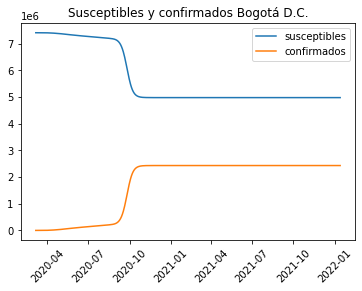

In [316]:
# Gráfico de casos susceptibles y confirmados - Bogotá D.C.
plt.plot(df_bogota['fecha'],df_bogota['susceptibles'],label='susceptibles')
plt.plot(df_bogota['fecha'],df_bogota['confirmados'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Susceptibles y confirmados Bogotá D.C.")
plt.legend(loc='best')
plt.show()

#### **Comportamiento**

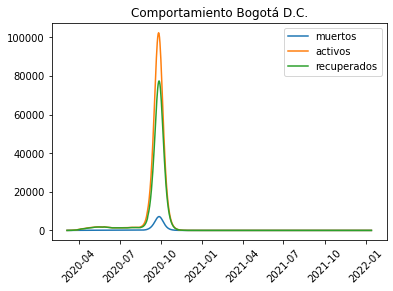

In [317]:
# Gráfico de comportamiento - Bogotá D.C.
plt.plot(df_bogota['fecha'],df_bogota['muertos'], label='muertos')
plt.plot(df_bogota['fecha'],df_bogota['activos'], label = 'activos')
plt.plot(df_bogota['fecha'],df_bogota['recuperados'], label = 'recuperados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.title("Comportamiento Bogotá D.C.")
plt.show()

### **Ciudad Cali**

In [318]:
data_cali_sir = data[data['ciudad_de_ubicaci_n']=='Cali']
data_cali_sir['tasa_contagio'] = np.nan

In [319]:
dct = {'Poblacion_total':2227642} #Población ciudad Cali
data_final_pobl_cali = data_cali_sir.assign(**dct)

In [320]:
data_final_pobl_cali.reset_index(inplace=True)

In [321]:
## Cálculo de la tasa de contagios para Cali sobre el histórico de casos desde el inicio de la pandemia
for index, row in data_final_pobl_cali.iterrows():
  if index==0:
    valor_inicial=1.7
    data_final_pobl_cali['tasa_contagio'].iloc[index]=valor_inicial
  else:
    data_final_pobl_cali['tasa_contagio'].iloc[index]=data_final_pobl_cali['acumulado_dia_confirmados'].iloc[index]/data_final_pobl_cali['acumulado_dia_confirmados'].iloc[index-1]

In [322]:
# Cálculo de la tasa de recuperados para Cali sobre el histórico de casos desde el inicio de la pandemia
tasa_recup_cali= data_final_pobl_cali['acumulado_dia_recuperado']/data_final_pobl_cali['acumulado_dia_confirmados']
tasa_recup_cali= pd.DataFrame(tasa_recup_cali)
tasa_recup_cali.columns=['tasa_recuperados']

In [323]:
data_final_tasas_cali = data_final_pobl_cali.join(tasa_recup_cali)

In [324]:
#Guardo población inicial en la variable población
poblacion=data_final_tasas_cali.at[0,'Poblacion_total']
poblacion

2227642

In [325]:
# Inicialización de las variables de estudio
susceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
susceptibles=[]
susceptibles = np.insert(susceptibles, 0, susceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(data_final_tasas_cali['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(data_final_tasas_cali['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)

In [326]:
#Promedio movil tasa_contagio para 30 días
for i in range(1,30):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 30 días
for i in range(1,30):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [327]:
# Estimación de las variables del modelo SIR
i=1

for i in range (1,len(data_final_tasas_cali)+30):
  if activos[i-1]>=susceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*susceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.07,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    susceptibles=np.insert(susceptibles,i,susceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

In [328]:
df_c = list(zip(susceptibles,confirmados,total_recuperados,total_muertos,contagios,recuperados,muertos,activos,tasa_contagio,tasa_recuperados))
df_cal = pd.DataFrame(df_c)
df_cali = df_cal.rename(index=str, columns={0:'susceptibles',1:'confirmados',2:'total_recuperados',3:'total_muertos',4:'contagios',5:'recuperados',6:'muertos',7:'activos',8:'tasa_contagio',9:'tasa_recuperados'})
df_cali['fecha'] = pd.date_range(start='03/13/2020', periods=len(df_cali), freq='d')

#### **Susceptibles y Confirmados**

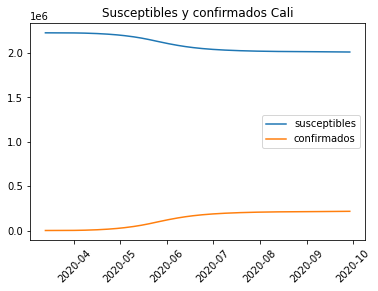

In [329]:
# Gráfico de casos susceptibles y confirmados - Cali
plt.plot(df_cali['fecha'],df_cali['susceptibles'],label='susceptibles')
plt.plot(df_cali['fecha'],df_cali['confirmados'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Susceptibles y confirmados Cali")
plt.legend(loc='best')
plt.show()

#### **Comportamiento**

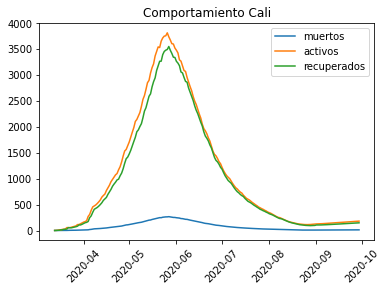

In [330]:
# Gráfico de comportamiento - Cali
plt.plot(df_cali['fecha'],df_cali['muertos'], label='muertos')
plt.plot(df_cali['fecha'],df_cali['activos'], label = 'activos')
plt.plot(df_cali['fecha'],df_cali['recuperados'], label = 'recuperados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.title("Comportamiento Cali")
plt.show()

### **Ciudad Barranquilla**

In [331]:
data_bquilla_sir = data[data['ciudad_de_ubicaci_n']=='Barranquilla']
data_bquilla_sir['tasa_contagio'] = np.nan

In [332]:
dct = {'Poblacion_total':1206319} #Población ciudad Barranquilla
data_final_pobl_bquilla = data_bquilla_sir.assign(**dct)
data_final_pobl_bquilla

,Unnamed: 0,ciudad_de_ubicaci_n,fecha_reporte_web,conteo_confirmados,conteo_recuperado,conteo_fallecidos,casos_activos,acumulado_dia_confirmados,acumulado_dia_recuperado,acumulado_dia_fallecidos,acumulado_dia_activos,tasa_contagio,Poblacion_total
687,0,Barranquilla,2020-03-16,2,2.0,0.0,0.0,2,2.0,0.0,0.0,NaN,1206319
688,1,Barranquilla,2020-03-19,3,3.0,0.0,0.0,5,5.0,0.0,0.0,NaN,1206319
689,2,Barranquilla,2020-03-21,2,2.0,0.0,0.0,7,7.0,0.0,0.0,NaN,1206319
690,3,Barranquilla,2020-03-24,2,2.0,0.0,0.0,9,9.0,0.0,0.0,NaN,1206319
691,4,Barranquilla,2020-03-25,3,3.0,0.0,0.0,12,12.0,0.0,0.0,NaN,1206319
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,159,Barranquilla,2020-08-31,62,2.0,0.0,60.0,35994,33405.0,1625.0,964.0,NaN,1206319
847,160,Barranquilla,2020-09-01,88,0.0,0.0,88.0,36082,33405.0,1625.0,1052.0,NaN,1206319
848,161,Barranquilla,2020-09-02,57,1.0,0.0,56.0,36139,33406.0,1625.0,1108.0,NaN,1206319
849,162,Barranquilla,2020-09-03,200,0.0,0.0,200.0,36339,33406.0,1625.0,1308.0,NaN,1206319


In [333]:
data_final_pobl_bquilla.reset_index(inplace=True)

In [334]:
# Cálculo de la tasa de contagios para Barranquilla sobre el histórico de casos desde el inicio de la pandemia
for index, row in data_final_pobl_bquilla.iterrows():
  if index==0:
    valor_inicial=1.7
    data_final_pobl_bquilla['tasa_contagio'].iloc[index]=valor_inicial
  else:
    data_final_pobl_bquilla['tasa_contagio'].iloc[index]=data_final_pobl_bquilla['acumulado_dia_confirmados'].iloc[index]/data_final_pobl_bquilla['acumulado_dia_confirmados'].iloc[index-1]

In [335]:
# Cálculo de la tasa de recuperados para Barranquilla sobre el histórico de casos desde el inicio de la pandemia
tasa_recup_bquilla = data_final_pobl_bquilla['acumulado_dia_recuperado']/data_final_pobl_bquilla['acumulado_dia_confirmados']
tasa_recup_bquilla = pd.DataFrame(tasa_recup_bquilla)
tasa_recup_bquilla.columns=['tasa_recuperados']

In [336]:
tasa_recup_bquilla.set_index('tasa_recuperados')

""
tasa_recuperados
1.000000
1.000000
1.000000
1.000000
1.000000
...
0.928071
0.925808
0.924375


In [337]:
data_final_tasas_bquilla = data_final_pobl_bquilla.join(tasa_recup_bquilla)

In [338]:
#Guardo población inicial en la variable población
poblacion=data_final_tasas_bquilla .at[0,'Poblacion_total']
poblacion

1206319

In [339]:
# Inicialización de las variables de estudio
susceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
susceptibles=[]
susceptibles = np.insert(susceptibles, 0, susceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(data_final_tasas_bquilla ['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(data_final_tasas_bquilla['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)

In [340]:
#Promedio movil tasa_contagio para 30 días
for i in range(1,30):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 30 días
for i in range(1,30):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [341]:
# Estimación de las variables del modelo SIR
i=1

for i in range (1,len(data_final_tasas_bquilla)+30):
  if activos[i-1]>=susceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*susceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.05,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    susceptibles=np.insert(susceptibles,i,susceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

In [342]:
df_bq = list(zip(susceptibles,confirmados,total_recuperados,total_muertos,contagios,recuperados,muertos,activos,tasa_contagio,tasa_recuperados))
df_bq = pd.DataFrame(df_bq)
df_bquilla = df_bq.rename(index=str, columns={0:'susceptibles',1:'confirmados',2:'total_recuperados',3:'total_muertos',4:'contagios',5:'recuperados',6:'muertos',7:'activos',8:'tasa_contagio',9:'tasa_recuperados'})
df_bquilla['fecha'] = pd.date_range(start='03/16/2020', periods=len(df_bquilla), freq='d')

#### **Susceptibles y Confirmados**

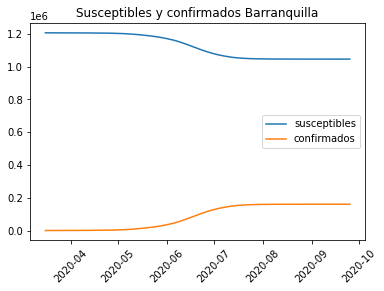

In [343]:
# Gráfico de casos susceptibles y confirmados - Barranquilla
plt.plot(df_bquilla['fecha'],df_bquilla['susceptibles'],label='susceptibles')
plt.plot(df_bquilla['fecha'],df_bquilla['confirmados'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Susceptibles y confirmados Barranquilla")
plt.legend(loc='best')
plt.show()

#### **Comportamiento**

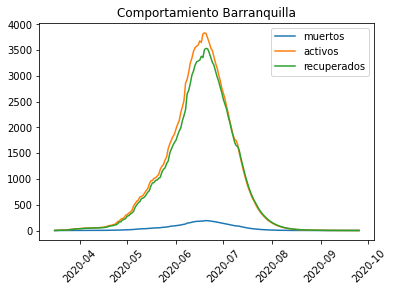

In [344]:
# Gráfico de comportamiento - Barranquilla
plt.plot(df_bquilla['fecha'],df_bquilla['muertos'], label='muertos')
plt.plot(df_bquilla['fecha'],df_bquilla['activos'], label = 'activos')
plt.plot(df_bquilla['fecha'],df_bquilla['recuperados'], label = 'recuperados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.title("Comportamiento Barranquilla")
plt.show()

### **Ciudad Cartagena de Indias**

In [345]:
data_cartagena_sir = data[data['ciudad_de_ubicaci_n']=='Cartagena de Indias']
data_cartagena_sir['tasa_contagio'] = np.nan

In [346]:
dct = {'Poblacion_total':973045} #Población ciudad Cartagena de Indias
data_final_pobl_cartagena = data_cartagena_sir.assign(**dct)
data_final_pobl_cartagena

,Unnamed: 0,ciudad_de_ubicaci_n,fecha_reporte_web,conteo_confirmados,conteo_recuperado,conteo_fallecidos,casos_activos,acumulado_dia_confirmados,acumulado_dia_recuperado,acumulado_dia_fallecidos,acumulado_dia_activos,tasa_contagio,Poblacion_total
520,514,Cartagena de Indias,2020-03-11,1,1.0,0.0,0.0,1,1.0,0.0,0.0,NaN,973045
521,515,Cartagena de Indias,2020-03-15,2,2.0,0.0,0.0,3,3.0,0.0,0.0,NaN,973045
522,516,Cartagena de Indias,2020-03-16,2,1.0,1.0,0.0,5,4.0,1.0,0.0,NaN,973045
523,517,Cartagena de Indias,2020-03-17,1,1.0,0.0,0.0,6,5.0,1.0,0.0,NaN,973045
524,518,Cartagena de Indias,2020-03-18,3,3.0,0.0,0.0,9,8.0,1.0,0.0,NaN,973045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,676,Cartagena de Indias,2020-08-31,82,3.0,1.0,78.0,20408,18955.0,527.0,926.0,NaN,973045
683,677,Cartagena de Indias,2020-09-01,140,0.0,1.0,139.0,20548,18955.0,528.0,1065.0,NaN,973045
684,678,Cartagena de Indias,2020-09-02,48,5.0,0.0,43.0,20596,18960.0,528.0,1108.0,NaN,973045
685,679,Cartagena de Indias,2020-09-03,67,0.0,0.0,67.0,20663,18960.0,528.0,1175.0,NaN,973045


In [347]:
data_final_pobl_cartagena.reset_index(inplace=True)

In [348]:
# Cálculo de la tasa de contagios para Cartagena de Indias sobre el histórico de casos desde el inicio de la pandemia
for index, row in data_final_pobl_cartagena.iterrows():
  if index==0:
    valor_inicial=1.7
    data_final_pobl_cartagena['tasa_contagio'].iloc[index]=valor_inicial
  else:
    data_final_pobl_cartagena['tasa_contagio'].iloc[index]=data_final_pobl_cartagena['acumulado_dia_confirmados'].iloc[index]/data_final_pobl_cartagena['acumulado_dia_confirmados'].iloc[index-1]

In [349]:
# Cálculo de la tasa de recuperados para Cartagena de Indias sobre el histórico de casos desde el inicio de la pandemia
tasa_recup_cartagena = data_final_pobl_cartagena['acumulado_dia_recuperado']/data_final_pobl_cartagena['acumulado_dia_confirmados']
tasa_recup_cartagena = pd.DataFrame(tasa_recup_cartagena)
tasa_recup_cartagena.columns=['tasa_recuperados']

In [350]:
tasa_recup_cartagena.set_index('tasa_recuperados')

""
tasa_recuperados
1.000000
1.000000
0.800000
0.833333
0.888889
...
0.928802
0.922474
0.920567


In [351]:
data_final_tasas_cartagena = data_final_pobl_cartagena.join(tasa_recup_cartagena)

In [352]:
#Guardo población inicial en la variable población
poblacion=data_final_tasas_cartagena.at[0,'Poblacion_total']
poblacion

973045

In [353]:
# Inicialización de las variables de estudio
susceptibles_inicial=poblacion
casos_inicial=1
activos_inicial=1

#Vectores para almacenar
susceptibles=[]
susceptibles = np.insert(susceptibles, 0, susceptibles_inicial, axis=0)
confirmados=[]
confirmados = np.insert(confirmados, 0, casos_inicial, axis=0)
total_recuperados=[]
total_recuperados = np.insert(total_recuperados, 0, 0, axis=0)
total_muertos=[]
total_muertos = np.insert(total_muertos, 0, 0, axis=0)
contagios=[]
contagios = np.insert(contagios, 0, 0, axis=0)
recuperados=[]
recuperados=np.insert(recuperados,0,0,axis=0)
muertos=[]
muertos=np.insert(muertos,0,0,axis=0)
activos=[]
activos = np.insert(activos, 0, casos_inicial, axis=0)
tasa_contagio= pd.DataFrame(data_final_tasas_cartagena['tasa_contagio']).to_numpy()
tasa_contagio = np.insert(tasa_contagio, 0, 0., axis=0)
tasa_recuperados= pd.DataFrame(data_final_tasas_cartagena['tasa_recuperados']).to_numpy()
tasa_recuperados = np.insert(tasa_recuperados, 0, 0., axis=0)

In [354]:
#Promedio movil tasa_contagio para 30 días
for i in range(1,30):
  tasa_contagio=np.insert(tasa_contagio,len(tasa_contagio),
                          np.average(tasa_contagio[len(tasa_contagio)-10:len(tasa_contagio)]),axis=0)

#Promedio movil recuperados para 30 días
for i in range(1,30):
  tasa_recuperados=np.insert(tasa_recuperados,len(tasa_recuperados),
                          np.average(tasa_recuperados[len(tasa_recuperados)-10:len(tasa_recuperados)]),axis=0)

In [355]:
# Estimación de las variables del modelo SIR
i=1

for i in range (1,len(data_final_tasas_cartagena)+30):
  if activos[i-1]>=susceptibles[i-1]:
    contagios=np.insert(contagios, i,0,axis=0)
  else:
    contagios=np.insert(contagios, i,(tasa_contagio[i]*activos[i-1]*susceptibles[i-1])/poblacion,axis=0)
    confirmados=np.insert(confirmados, i,confirmados[i-1]+contagios[i],axis=0)
    recuperados=np.insert(recuperados,i,activos[i-1]*tasa_recuperados[i],axis=0)
    muertos=np.insert(muertos,i,activos[i-1]*0.07,axis=0)
    activos=np.insert(activos,i,activos[i-1]+contagios[i]-recuperados[i]-muertos[i],axis=0)
    susceptibles=np.insert(susceptibles,i,susceptibles[i-1]-contagios[i],axis=0)
    total_recuperados=np.insert(total_recuperados,i,total_recuperados[i-1]+recuperados[i],axis=0)
    total_muertos=np.insert(total_muertos,i,total_muertos[i-1]+muertos[i],axis=0)

In [356]:
df_car = list(zip(susceptibles,confirmados,total_recuperados,total_muertos,contagios,recuperados,muertos,activos,tasa_contagio,tasa_recuperados))
df_cart = pd.DataFrame(df_car)
df_cartagena=df_cart.rename(index=str, columns={0:'susceptibles',1:'confirmados',2:'total_recuperados',3:'total_muertos',4:'contagios',5:'recuperados',6:'muertos',7:'activos',8:'tasa_contagio',9:'tasa_recuperados'})
df_cartagena['fecha'] = pd.date_range(start='03/11/2020', periods=len(df_cartagena), freq='d')

#### **Susceptibles y Confirmados**

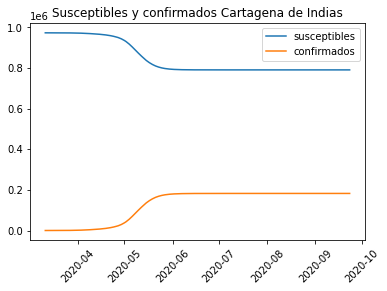

In [357]:
# Gráfico de casos susceptibles y confirmados - Cartagena de Indias
plt.plot(df_cartagena['fecha'],df_cartagena['susceptibles'],label='susceptibles')
plt.plot(df_cartagena['fecha'],df_cartagena['confirmados'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Susceptibles y confirmados Cartagena de Indias")
plt.legend(loc='best')
plt.show()

#### **Comportamiento**

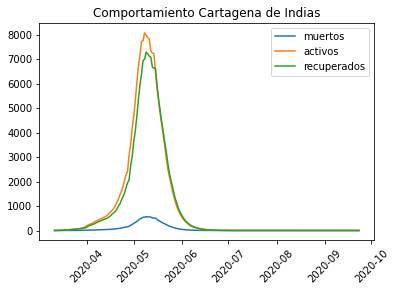

In [358]:
# Gráfico de comportamiento - Cartagena de Indias
plt.plot(df_cartagena['fecha'],df_cartagena['muertos'], label='muertos')
plt.plot(df_cartagena['fecha'],df_cartagena['activos'], label = 'activos')
plt.plot(df_cartagena['fecha'],df_cartagena['recuperados'], label = 'recuperados')
plt.xticks(rotation=45, horizontalalignment="center")
plt.legend(loc='best')
plt.title("Comportamiento Cartagena de Indias")
plt.show()

### **Ponderación**

A continuación, se realiza la ponderación de los modelos ARIMA y SIR para el pronóstico de casos activos, confriamaos, recuperados y fallecidos por COVID-19 en las cinco ciudades principales de Colombia (Bogotá D.C., Cali, Medellín, Cartagena de Indias y Barranquilla).

#### **Ciudad Medellín**

### **Casos Activos**

In [359]:
ponderado_med = pd.merge(df_medellin, prediction_med_activos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [360]:
ponderado_medellin = ponderado_med[['fecha','activos','pred_casos_activos_med_corto']]

In [361]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_medellin['porcentaje_ARIMA'] =  np.nan
for index, row in ponderado_medellin.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_medellin['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_medellin['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_medellin['porcentaje_ARIMA'].iloc[index]=0

In [362]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_medellin['porcentaje_SIR'] =  np.nan
for index, row in ponderado_medellin.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_medellin['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_medellin['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_medellin['porcentaje_SIR'].iloc[index]=1

In [363]:
ponderado_medellin['pred_casos_activos_med_corto'].fillna(0, inplace=True)

In [364]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos activos Medellín
calculo = ponderado_medellin['porcentaje_ARIMA']*ponderado_medellin['pred_casos_activos_med_corto']+ponderado_medellin['activos']*ponderado_medellin['porcentaje_SIR']
ponderado_medellin['calculo'] = calculo

### **Casos Confirmados**

In [365]:
ponderado_med_conf = pd.merge(df_medellin, prediction_med_confirmados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [366]:
ponderado_medellin_conf = ponderado_med_conf[['fecha','confirmados','pred_casos_confirmados_med_corto']]

In [367]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_medellin_conf['porcentaje_ARIMA'] =  np.nan
for index, row in ponderado_medellin_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_medellin_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_medellin_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_medellin_conf['porcentaje_ARIMA'].iloc[index]=0

In [368]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_medellin_conf['porcentaje_SIR'] =  np.nan
for index, row in ponderado_medellin_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_medellin_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_medellin_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_medellin_conf['porcentaje_SIR'].iloc[index]=1	

In [369]:
ponderado_medellin_conf['pred_casos_confirmados_med_corto'].fillna(0, inplace=True)

In [370]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos confirmados Medellín
calculo = ponderado_medellin_conf['porcentaje_ARIMA']*ponderado_medellin_conf['pred_casos_confirmados_med_corto']+ponderado_medellin_conf['confirmados']*ponderado_medellin_conf['porcentaje_SIR']
ponderado_medellin_conf['calculo'] = calculo

### **Casos Recuperados**

In [371]:
ponderado_med_rec = pd.merge(df_medellin, prediction_med_recuperados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [372]:
ponderado_medellin_rec = ponderado_med_rec[['fecha','recuperados','pred_casos_recuperados_med_corto']]

In [373]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_medellin_rec['porcentaje_ARIMA'] =  np.nan
for index, row in ponderado_medellin_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_medellin_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_medellin_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_medellin_rec['porcentaje_ARIMA'].iloc[index]=0

In [374]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_medellin_rec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_medellin_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_medellin_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_medellin_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_medellin_rec['porcentaje_SIR'].iloc[index]=1	

In [375]:
ponderado_medellin_rec['pred_casos_recuperados_med_corto'].fillna(0, inplace=True)

In [376]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos recuperados Medellín
calculo = ponderado_medellin_rec['porcentaje_ARIMA']*ponderado_medellin_rec['pred_casos_recuperados_med_corto']+ponderado_medellin_rec['recuperados']*ponderado_medellin_rec['porcentaje_SIR']
ponderado_medellin_rec['calculo'] = calculo

### **Casos Fallecidos**

In [377]:
ponderado_med_fallec = pd.merge(df_medellin, prediction_med_fallecidos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [378]:
ponderado_medellin_fallec = ponderado_med_fallec[['fecha','muertos','pred_casos_fallecidos_med_corto']]

In [379]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_medellin_fallec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_medellin_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_medellin_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_medellin_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_medellin_fallec['porcentaje_ARIMA'].iloc[index]=0

In [380]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_medellin_fallec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_medellin_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_medellin_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_medellin_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_medellin_fallec['porcentaje_SIR'].iloc[index]=1

In [381]:
ponderado_medellin_fallec['pred_casos_fallecidos_med_corto'].fillna(0, inplace=True)

In [382]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos fallecidos Medellín
calculo = ponderado_medellin_fallec['porcentaje_ARIMA']*ponderado_medellin_fallec['pred_casos_fallecidos_med_corto']+ponderado_medellin_fallec['muertos']*ponderado_medellin_fallec['porcentaje_SIR']
ponderado_medellin_fallec['calculo'] = calculo

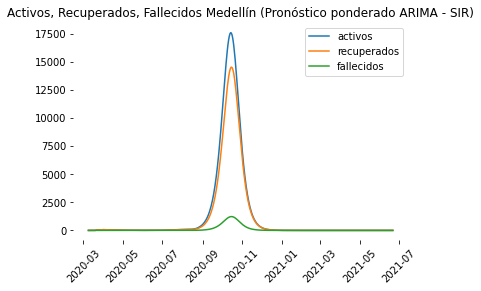

In [383]:
## Gráfico de comportamiento - Pronóstico ponderado ARIMA - SIR Medellín
fig,ax = plt.subplots()
plt.plot(ponderado_medellin['fecha'],ponderado_medellin['calculo'], label='activos')
plt.plot(ponderado_medellin_rec['fecha'],ponderado_medellin_rec['calculo'], label='recuperados')
plt.plot(ponderado_medellin_fallec['fecha'],ponderado_medellin_fallec['calculo'], label='fallecidos')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Activos, Recuperados, Fallecidos Medellín (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

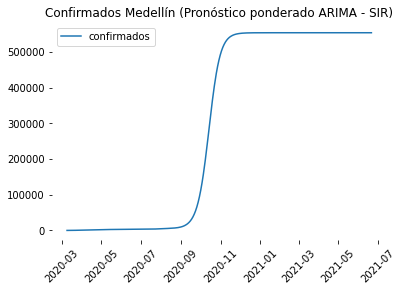

In [384]:
## Gráfico de confirmados - Pronóstico ponderado ARIMA - SIR Medellín
fig,ax = plt.subplots()
plt.plot(ponderado_medellin_conf['fecha'],ponderado_medellin_conf['calculo'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Confirmados Medellín (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

## **Ciudad Bogotá D.C.**

### **Casos Activos**

In [385]:
ponderado_bgta = pd.merge(df_bogota, prediction_bgta_activos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [386]:
ponderado_bogota = ponderado_bgta[['fecha','activos','pred_casos_activos_bgta_corto']]

In [387]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bogota['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bogota.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bogota['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bogota['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bogota['porcentaje_ARIMA'].iloc[index]=0

In [388]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bogota['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bogota.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bogota['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bogota['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bogota['porcentaje_SIR'].iloc[index]=1	


In [389]:
ponderado_bogota['pred_casos_activos_bgta_corto'].fillna(0, inplace=True)

In [390]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos activos Bogotá D.C.
calculo = ponderado_bogota['porcentaje_ARIMA']*ponderado_bogota['pred_casos_activos_bgta_corto']+ponderado_bogota['activos']*ponderado_bogota['porcentaje_SIR']
ponderado_bogota['calculo'] = calculo

### **Casos Confirmados**

In [391]:
ponderado_bgta_conf = pd.merge(df_bogota, prediction_bgta_confirmados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [392]:
ponderado_bogota_conf = ponderado_bgta_conf[['fecha','confirmados','pred_casos_confirmados_bgta_corto']]

In [393]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bogota_conf['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bogota_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bogota_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bogota_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bogota_conf['porcentaje_ARIMA'].iloc[index]=0

In [394]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bogota_conf['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bogota_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bogota_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bogota_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bogota_conf['porcentaje_SIR'].iloc[index]=1

In [395]:
ponderado_bogota_conf['pred_casos_confirmados_bgta_corto'].fillna(0, inplace=True)

In [396]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos confirmados Bogotá D.C.
calculo = ponderado_bogota_conf['porcentaje_ARIMA']*ponderado_bogota_conf['pred_casos_confirmados_bgta_corto']+ponderado_bogota_conf['confirmados']*ponderado_bogota_conf['porcentaje_SIR']
ponderado_bogota_conf['calculo'] = calculo

### **Casos Recuperados**

In [397]:
ponderado_bgta_rec = pd.merge(df_bogota, prediction_bgta_recuperados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [398]:
ponderado_bogota_rec = ponderado_bgta_rec[['fecha','recuperados','pred_casos_recuperados_bgta_corto']]

In [399]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bogota_rec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bogota_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bogota_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bogota_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bogota_rec['porcentaje_ARIMA'].iloc[index]=0

In [400]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bogota_rec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bogota_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bogota_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bogota_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bogota_rec['porcentaje_SIR'].iloc[index]=1

In [401]:
ponderado_bogota_rec['pred_casos_recuperados_bgta_corto'].fillna(0, inplace=True)

In [402]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos recuperados Bogotá D.C.
calculo = ponderado_bogota_rec['porcentaje_ARIMA']*ponderado_bogota_rec['pred_casos_recuperados_bgta_corto']+ponderado_bogota_rec['recuperados']*ponderado_bogota_rec['porcentaje_SIR']
ponderado_bogota_rec['calculo'] = calculo

### **Casos Fallecidos**

In [403]:
ponderado_bgta_fallec = pd.merge(df_bogota, prediction_bgta_fallecidos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [404]:
ponderado_bogota_fallec  = ponderado_bgta_fallec[['fecha','muertos','pred_casos_fallecidos_bgta_corto']]

In [405]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bogota_fallec ['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bogota_fallec .iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bogota_fallec ['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bogota_fallec ['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bogota_fallec ['porcentaje_ARIMA'].iloc[index]=0

In [406]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bogota_fallec ['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bogota_fallec .iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bogota_fallec ['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bogota_fallec ['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bogota_fallec ['porcentaje_SIR'].iloc[index]=1

In [407]:
ponderado_bogota_fallec ['pred_casos_fallecidos_bgta_corto'].fillna(0, inplace=True)

In [408]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos fallecidos Bogotá D.C.
calculo = ponderado_bogota_fallec ['porcentaje_ARIMA']*ponderado_bogota_fallec ['pred_casos_fallecidos_bgta_corto']+ponderado_bogota_fallec ['muertos']*ponderado_bogota_fallec ['porcentaje_SIR']
ponderado_bogota_fallec ['calculo'] = calculo

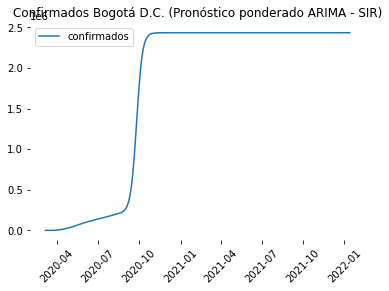

In [409]:
## Gráfico de confirmados - Pronóstico ponderado ARIMA - SIR Bogotá D.C.
fig,ax = plt.subplots()
plt.plot(ponderado_bogota_conf['fecha'],ponderado_bogota_conf['calculo'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Confirmados Bogotá D.C. (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

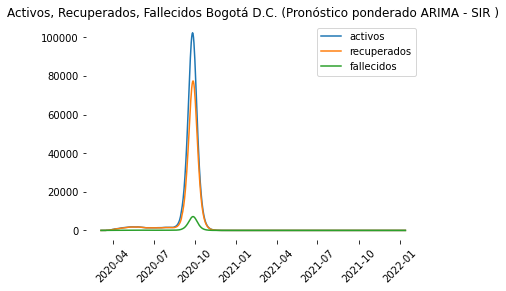

In [410]:
## Gráfico de comportamiento - Pronóstico ponderado ARIMA - SIR Bogotá D.C.
fig,ax = plt.subplots()
plt.plot(ponderado_bogota['fecha'],ponderado_bogota['calculo'], label='activos')
plt.plot(ponderado_bogota_rec['fecha'],ponderado_bogota_rec['calculo'], label='recuperados')
plt.plot(ponderado_bogota_fallec['fecha'],ponderado_bogota_fallec['calculo'], label='fallecidos')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Activos, Recuperados, Fallecidos Bogotá D.C. (Pronóstico ponderado ARIMA - SIR )")
plt.legend(loc='best')
plt.show()

## **Ciudad Cali**

In [411]:
ponderado_cal = pd.merge(df_cali, prediction_cali_activos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [412]:
ponderado_cali  = ponderado_cal[['fecha','activos','pred_casos_activos_cali_corto']]

In [413]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cali ['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cali .iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cali ['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cali ['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cali ['porcentaje_ARIMA'].iloc[index]=0

In [414]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cali ['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cali .iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cali ['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cali ['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cali ['porcentaje_SIR'].iloc[index]=1	

In [415]:
ponderado_cali ['pred_casos_activos_cali_corto'].fillna(0, inplace=True)

In [416]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos activos Cali
calculo = ponderado_cali ['porcentaje_ARIMA']*ponderado_cali ['pred_casos_activos_cali_corto']+ponderado_cali['activos']*ponderado_cali ['porcentaje_SIR']
ponderado_cali ['calculo'] = calculo

### **Casos Confirmados**

In [417]:
ponderado_cal_conf = pd.merge(df_cali, prediction_cali_confirmados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [418]:
ponderado_cali_conf  = ponderado_cal_conf[['fecha','confirmados','pred_casos_confirmados_cali_corto']]

In [419]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cali_conf ['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cali_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cali_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cali_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cali_conf['porcentaje_ARIMA'].iloc[index]=0

In [420]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cali_conf['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cali_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cali_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cali_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cali_conf['porcentaje_SIR'].iloc[index]=1

In [421]:
ponderado_cali_conf['pred_casos_confirmados_cali_corto'].fillna(0, inplace=True)

In [422]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos confirmados Cali
calculo = ponderado_cali_conf['porcentaje_ARIMA']*ponderado_cali_conf['pred_casos_confirmados_cali_corto']+ponderado_cali_conf['confirmados']*ponderado_cali_conf['porcentaje_SIR']
ponderado_cali_conf['calculo'] = calculo

### **Casos Recuperados**

In [423]:
ponderado_cal_rec = pd.merge(df_cali, prediction_cali_recuperados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [424]:
ponderado_cali_rec   = ponderado_cal_rec[['fecha','recuperados','pred_casos_recuperados_cali_corto']]

In [425]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cali_rec  ['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cali_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cali_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cali_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cali_rec['porcentaje_ARIMA'].iloc[index]=0

In [426]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cali_rec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cali_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cali_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cali_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cali_rec['porcentaje_SIR'].iloc[index]=1	

In [427]:
ponderado_cali_rec ['pred_casos_recuperados_cali_corto'].fillna(0, inplace=True)

In [428]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos recuperados Cali
calculo = ponderado_cali_rec['porcentaje_ARIMA']*ponderado_cali_rec['pred_casos_recuperados_cali_corto']+ponderado_cali_rec['recuperados']*ponderado_cali_rec['porcentaje_SIR']
ponderado_cali_rec['calculo'] = calculo

### **Casos Fallecidos**

In [429]:
ponderado_cal_fallec = pd.merge(df_cali, prediction_cali_fallecidos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [430]:
ponderado_cali_fallec  = ponderado_cal_fallec[['fecha','muertos','pred_casos_fallecidos_cali_corto']]

In [431]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cali_fallec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cali_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cali_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cali_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cali_fallec['porcentaje_ARIMA'].iloc[index]=0

In [432]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cali_fallec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cali_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cali_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cali_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cali_fallec['porcentaje_SIR'].iloc[index]=1

In [433]:
ponderado_cali_fallec ['pred_casos_fallecidos_cali_corto'].fillna(0, inplace=True)

In [434]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos fallecidos Cali
calculo = ponderado_cali_fallec['porcentaje_ARIMA']*ponderado_cali_fallec['pred_casos_fallecidos_cali_corto']+ponderado_cali_fallec['muertos']*ponderado_cali_fallec['porcentaje_SIR']
ponderado_cali_fallec['calculo'] = calculo

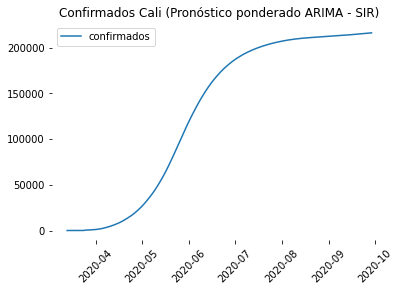

In [435]:
## Gráfico de confirmados - Pronóstico ponderado SIR Cali
fig,ax = plt.subplots()
plt.plot(ponderado_cali_conf['fecha'],ponderado_cali_conf['calculo'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Confirmados Cali (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

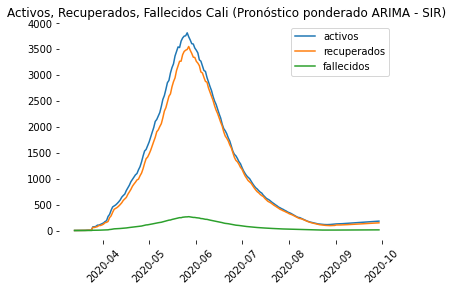

In [436]:
## Gráfico de comportamiento - Pronóstico ponderado ARIMA - SIR Cali
fig,ax = plt.subplots()
plt.plot(ponderado_cali['fecha'],ponderado_cali['calculo'], label='activos')
plt.plot(ponderado_cali_rec['fecha'],ponderado_cali_rec['calculo'], label='recuperados')
plt.plot(ponderado_cali_fallec['fecha'],ponderado_cali_fallec['calculo'], label='fallecidos')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Activos, Recuperados, Fallecidos Cali (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

## **Ciudad Barranquilla**

### **Casos Activos**

In [437]:
ponderado_bq = pd.merge(df_bquilla, prediction_barranquilla_activos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [438]:
ponderado_bquilla  = ponderado_bq[['fecha','activos','pred_casos_activos_barranquilla_corto']]

In [439]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bquilla['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bquilla.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bquilla['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bquilla['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla['porcentaje_ARIMA'].iloc[index]=0

In [440]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bquilla['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bquilla.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bquilla['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bquilla['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla['porcentaje_SIR'].iloc[index]=1

In [441]:
ponderado_bquilla['pred_casos_activos_barranquilla_corto'].fillna(0, inplace=True)

In [442]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos activos Barranquilla
calculo = ponderado_bquilla['porcentaje_ARIMA']*ponderado_bquilla['pred_casos_activos_barranquilla_corto']+ponderado_bquilla['activos']*ponderado_bquilla['porcentaje_SIR']
ponderado_bquilla['calculo'] = calculo

### **Casos Confirmados**

In [443]:
ponderado_bq_conf = pd.merge(df_bquilla, prediction_barranquilla_confirmados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [444]:
ponderado_bquilla_conf  = ponderado_bq_conf[['fecha','confirmados','pred_casos_confirmados_barranquilla_corto']]

In [445]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bquilla_conf['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bquilla_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bquilla_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bquilla_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla_conf['porcentaje_ARIMA'].iloc[index]=0

In [446]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bquilla_conf['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bquilla_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bquilla_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bquilla_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla_conf['porcentaje_SIR'].iloc[index]=1

In [447]:
ponderado_bquilla_conf['pred_casos_confirmados_barranquilla_corto'].fillna(0, inplace=True)

In [448]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos confirmados Barranquilla
calculo = ponderado_bquilla_conf['porcentaje_ARIMA']*ponderado_bquilla_conf['pred_casos_confirmados_barranquilla_corto']+ponderado_bquilla_conf['confirmados']*ponderado_bquilla_conf['porcentaje_SIR']
ponderado_bquilla_conf['calculo'] = calculo

### **Casos Recuperados**

In [449]:
ponderado_bq_rec = pd.merge(df_bquilla, prediction_barranquilla_recuperados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [450]:
ponderado_bquilla_rec  = ponderado_bq_rec[['fecha','recuperados','pred_casos_recuperados_barranquilla_corto']]

In [451]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bquilla_rec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bquilla_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bquilla_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bquilla_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla_rec['porcentaje_ARIMA'].iloc[index]=0

In [452]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bquilla_rec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bquilla_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bquilla_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bquilla_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla_rec['porcentaje_SIR'].iloc[index]=1

In [453]:
ponderado_bquilla_rec['pred_casos_recuperados_barranquilla_corto'].fillna(0, inplace=True)

In [454]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos recuperados Barranquilla
calculo = ponderado_bquilla_rec['porcentaje_ARIMA']*ponderado_bquilla_rec['pred_casos_recuperados_barranquilla_corto']+ponderado_bquilla_rec['recuperados']*ponderado_bquilla_rec['porcentaje_SIR']
ponderado_bquilla_rec['calculo'] = calculo

### **Casos Fallecidos**

In [455]:
ponderado_bq_fallec = pd.merge(df_bquilla, prediction_barranquilla_fallecidos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [456]:
ponderado_bquilla_fallec  = ponderado_bq_fallec[['fecha','muertos','pred_casos_fallecidos_barranquilla_corto']]

In [457]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_bquilla_fallec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_bquilla_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_bquilla_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_bquilla_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla_fallec['porcentaje_ARIMA'].iloc[index]=0

In [458]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_bquilla_fallec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_bquilla_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_bquilla_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_bquilla_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_bquilla_fallec['porcentaje_SIR'].iloc[index]=1

In [459]:
ponderado_bquilla_fallec['pred_casos_fallecidos_barranquilla_corto'].fillna(0, inplace=True)

In [460]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos fallecidos Barranquilla
calculo = ponderado_bquilla_fallec['porcentaje_ARIMA']*ponderado_bquilla_fallec['pred_casos_fallecidos_barranquilla_corto']+ponderado_bquilla_fallec['muertos']*ponderado_bquilla_fallec['porcentaje_SIR']
ponderado_bquilla_fallec['calculo'] = calculo

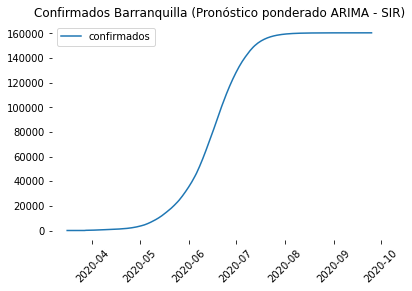

In [461]:
## Gráfico de confirmados - Pronóstico ponderado ARIMA - SIR Barranquilla
fig,ax = plt.subplots()
plt.plot(ponderado_bquilla_conf['fecha'],ponderado_bquilla_conf['calculo'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Confirmados Barranquilla (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

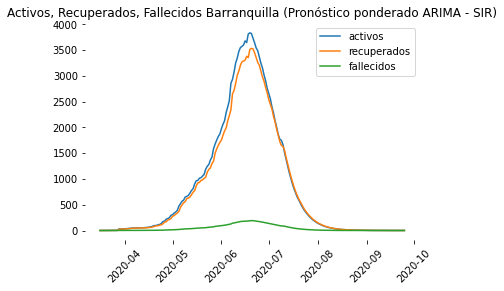

In [462]:
## Gráfico de comportamiento - Pronóstico ponderado ARIMA - SIR Barranquilla
fig,ax = plt.subplots()
plt.plot(ponderado_bquilla['fecha'],ponderado_bquilla['calculo'], label='activos')
plt.plot(ponderado_bquilla_rec['fecha'],ponderado_bquilla_rec['calculo'], label='recuperados')
plt.plot(ponderado_bquilla_fallec['fecha'],ponderado_bquilla_fallec['calculo'], label='fallecidos')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Activos, Recuperados, Fallecidos Barranquilla (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

## **Ciudad Cartagena de Indias**

### **Casos Activos**

In [463]:
ponderado_car = pd.merge(df_cartagena, prediction_cartagena_activos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [464]:
ponderado_cartagena  = ponderado_car[['fecha','activos','pred_casos_activos_cartagena_corto']]

In [465]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cartagena['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cartagena.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cartagena['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cartagena['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena['porcentaje_ARIMA'].iloc[index]=0

In [466]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cartagena['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cartagena.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cartagena['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cartagena['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena['porcentaje_SIR'].iloc[index]=1	

In [467]:
ponderado_cartagena['pred_casos_activos_cartagena_corto'].fillna(0, inplace=True)

In [468]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos activos Cartagena de Indias
calculo = ponderado_cartagena['porcentaje_ARIMA']*ponderado_cartagena['pred_casos_activos_cartagena_corto']+ponderado_cartagena['activos']*ponderado_cartagena['porcentaje_SIR']
ponderado_cartagena['calculo'] = calculo

### **Casos Confirmados**

In [469]:
ponderado_car_conf = pd.merge(df_cartagena, prediction_cartagena_confirmados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [470]:
ponderado_cartagena_conf  = ponderado_car_conf[['fecha','confirmados','pred_casos_confirmados_cartagena_corto']]

In [471]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cartagena_conf['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cartagena_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cartagena_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cartagena_conf['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena_conf['porcentaje_ARIMA'].iloc[index]=0

In [472]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cartagena_conf['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cartagena_conf.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cartagena_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cartagena_conf['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena_conf['porcentaje_SIR'].iloc[index]=1

In [473]:
ponderado_cartagena_conf['pred_casos_confirmados_cartagena_corto'].fillna(0, inplace=True)

In [474]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos confirmados Cartagena de Indias
calculo = ponderado_cartagena_conf['porcentaje_ARIMA']*ponderado_cartagena_conf['pred_casos_confirmados_cartagena_corto']+ponderado_cartagena_conf['confirmados']*ponderado_cartagena_conf['porcentaje_SIR']
ponderado_cartagena_conf['calculo'] = calculo

### **Casos Recuperados**

In [475]:
ponderado_car_rec = pd.merge(df_cartagena, prediction_cartagena_recuperados_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [476]:
ponderado_cartagena_rec  = ponderado_car_rec[['fecha','recuperados','pred_casos_recuperados_cartagena_corto']]

In [477]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cartagena_rec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cartagena_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cartagena_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cartagena_rec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena_rec['porcentaje_ARIMA'].iloc[index]=0

In [478]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cartagena_rec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cartagena_rec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cartagena_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cartagena_rec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena_rec['porcentaje_SIR'].iloc[index]=1	

In [479]:
ponderado_cartagena_rec['pred_casos_recuperados_cartagena_corto'].fillna(0, inplace=True)

In [480]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos recuperados Cartagena de Indias
calculo = ponderado_cartagena_rec['porcentaje_ARIMA']*ponderado_cartagena_rec['pred_casos_recuperados_cartagena_corto']+ponderado_cartagena_rec['recuperados']*ponderado_cartagena_rec['porcentaje_SIR']
ponderado_cartagena_rec['calculo'] = calculo

### **Casos Fallecidos**

In [481]:
ponderado_car_fallec = pd.merge(df_cartagena, prediction_cartagena_fallecidos_corto,  how='left', left_on=['fecha'], right_on = ['fecha_pred'])

In [482]:
ponderado_cartagena_fallec  = ponderado_car_fallec[['fecha','muertos','pred_casos_fallecidos_cartagena_corto']]

In [483]:
# Ponderación del modelo ARIMA (día 0 a 12 - 0.9 y día 13 a 20 - 0.1)
ponderado_cartagena_fallec['porcentaje_ARIMA'] =  np.nan

for index, row in ponderado_cartagena_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.9
    ponderado_cartagena_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.1
    ponderado_cartagena_fallec['porcentaje_ARIMA'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena_fallec['porcentaje_ARIMA'].iloc[index]=0

In [484]:
# Ponderación del modelo SIR (día 0 a 12 - 0.1 y día 13 a 20 - 0.9)
ponderado_cartagena_fallec['porcentaje_SIR'] =  np.nan
for index, row in ponderado_cartagena_fallec.iterrows():
  if index in range(0,12):
    valor_inicial=0.1
    ponderado_cartagena_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  elif index in range(13,20):
    valor_inicial=0.9
    ponderado_cartagena_fallec['porcentaje_SIR'].iloc[index]=valor_inicial
  else:
    ponderado_cartagena_fallec['porcentaje_SIR'].iloc[index]=1

In [485]:
ponderado_cartagena_fallec['pred_casos_fallecidos_cartagena_corto'].fillna(0, inplace=True)

In [486]:
# Se realiza el cálculo de la ponderación ARIMA - SIR para casos fallecidos Cartagena de Indias
calculo = ponderado_cartagena_fallec['porcentaje_ARIMA']*ponderado_cartagena_fallec['pred_casos_fallecidos_cartagena_corto']+ponderado_cartagena_fallec['muertos']*ponderado_cartagena_fallec['porcentaje_SIR']
ponderado_cartagena_fallec['calculo'] = calculo

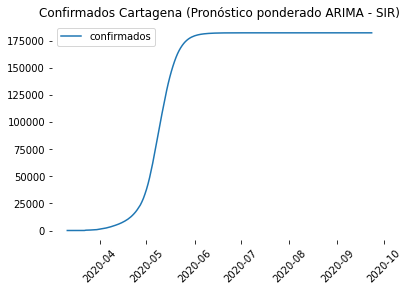

In [487]:
## Gráfico de confirmados - Pronóstico ponderado ARIMA - SIR Cartagena
fig,ax = plt.subplots()
plt.plot(ponderado_cartagena_conf['fecha'],ponderado_cartagena_conf['calculo'], label='confirmados')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Confirmados Cartagena (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()

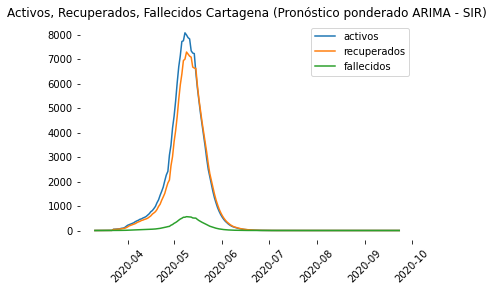

In [488]:
## Gráfico de comportamiento - Pronóstico ponderado ARIMA - SIR Cartagena
fig,ax = plt.subplots()
plt.plot(ponderado_cartagena['fecha'],ponderado_cartagena['calculo'], label='activos')
plt.plot(ponderado_cartagena_rec['fecha'],ponderado_cartagena_rec['calculo'], label='recuperados')
plt.plot(ponderado_cartagena_fallec['fecha'],ponderado_cartagena_fallec['calculo'], label='fallecidos')
plt.xticks(rotation=45, horizontalalignment="center")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Activos, Recuperados, Fallecidos Cartagena (Pronóstico ponderado ARIMA - SIR)")
plt.legend(loc='best')
plt.show()